# Market Segmentation in Insurance

## 1. Problem

## 2. Data understanding

**Link**: https://www.kaggle.com/datasets/jillanisofttech/market-segmentation-in-insurance-unsupervised/data

## 3.Data exploration

### 3.1. Review state of the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
plt.style.use("ggplot")

In [5]:
PATH_DATA = os.path.join(os.getenv("PATH_DATA_PROJECTS"), "Tabular", "market_segmentation_insurance")

In [6]:
df = pd.read_csv(os.path.join(PATH_DATA, "Customer Data.csv"))
print("Shape:", df.shape)
df.head()

Shape: (8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
print("Total missing by columns:")
df.isnull().sum()

Total missing by columns:


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### 3.2. Cleaning data

Complete missing values

In [9]:
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())

In [10]:
print("Total missing by columns:")
df.isnull().sum()

Total missing by columns:


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Remove high cardinality variable

In [11]:
df = df.drop(columns = "CUST_ID")

### 3.3. Exploratory data analysis

#### 3.3.1. Numerical variables

In [12]:
numeric_features = ["BALANCE", "BALANCE_FREQUENCY", "PURCHASES", "ONEOFF_PURCHASES", "INSTALLMENTS_PURCHASES", "PURCHASES_FREQUENCY", "ONEOFF_PURCHASES_FREQUENCY", 
"PURCHASES_INSTALLMENTS_FREQUENCY", "CASH_ADVANCE_FREQUENCY", "CASH_ADVANCE_TRX", "PURCHASES_TRX", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS", "PRC_FULL_PAYMENT"]

Calculate descriptive statistics

In [13]:
df[numeric_features].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000
CASH_ADVANCE_TRX,8950.0,3.248827,6.824647,0.000000,0.000000,0.000000,4.000000,123.00000


In [30]:
def plot_numeric(df, variable_name):
    # Calculate measures of central tendency
    mean = round(df[variable_name].mean(), 2)
    median = round(df[variable_name].median(), 2)

    # Calculate measures of central tendency
    skewness = round(df[variable_name].skew(), 2)
    min = df[variable_name].min()
    max = df[variable_name].max()
    range = round(max- min, 2)
    q1 = np.percentile(df[variable_name], 25)
    q3 = np.percentile(df[variable_name], 75)
    iqr = round(q3 - q1, 2)
    q90 = np.percentile(df[variable_name], 90)

    # Visualization
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 6))
    fig.suptitle(f"Distribution \
                 \n (mean: {mean} - median: {median} - skewness: {skewness}) \
                 \n(Range: {range} - IQR: {iqr})")
    ax1.axvline(x = mean, linestyle = "dashed", color = "blue", label = "Mean")
    ax1.axvline(x = median, linestyle = "dashed", color = "green", label = "Median")
    ax1.legend()

    ax2.axvline(x = q1, linestyle = "dashed", color = "blue", label = "Q1")
    ax2.axvline(x = median, linestyle = "dashed", color = "green", label = "Median")
    ax2.axvline(x = q3, linestyle = "dashed", color = "red", label = "Q3")
    ax2.legend()

    ax3.axvline(x = q90, linestyle = "dashed", color = "blue", label = "90%")
    ax3.legend()

    sns.histplot(x = df[variable_name], ax = ax1, bins = 30)
    sns.boxplot(x = df[variable_name], ax = ax2)
    sns.ecdfplot(data = df, x = variable_name, ax = ax3)

    plt.show()

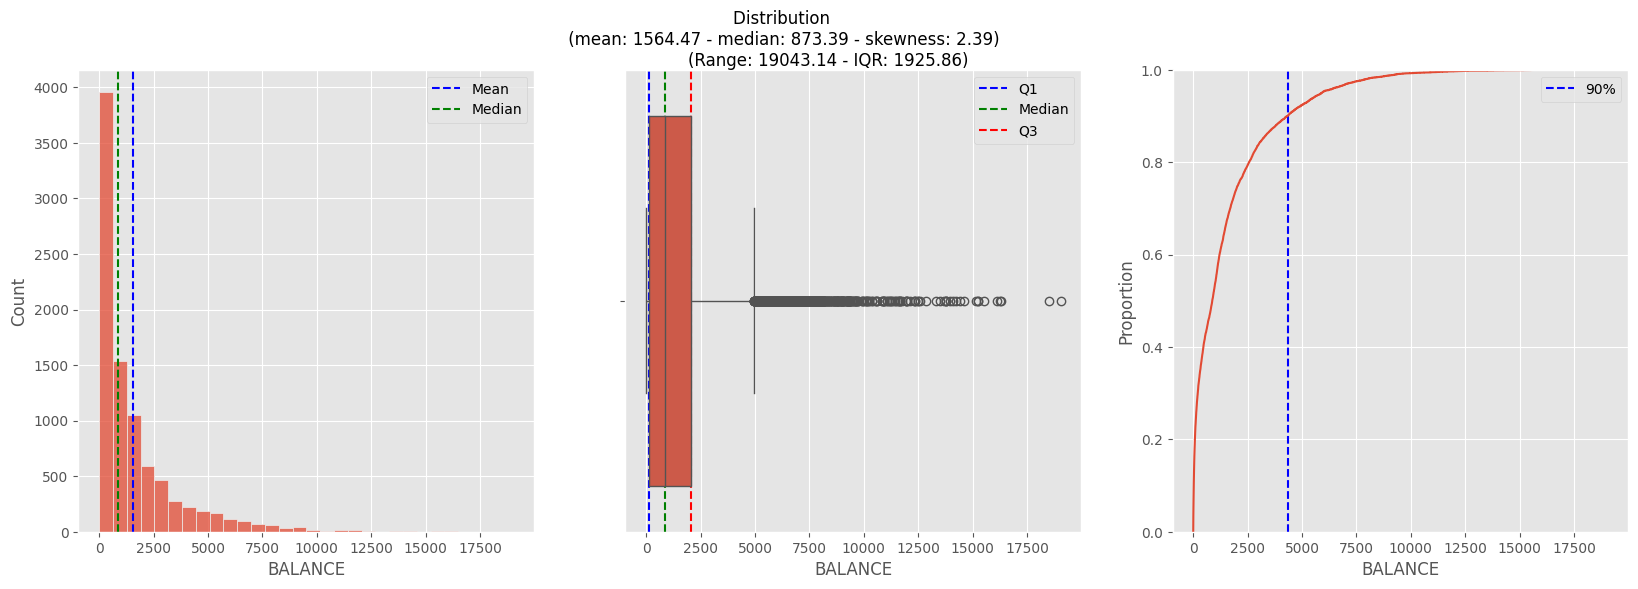

In [31]:
plot_numeric(df, "BALANCE")

In [18]:
df["BALANCE"].describe()

count     8950.000000
mean      1564.474828
std       2081.531879
min          0.000000
25%        128.281915
50%        873.385231
75%       2054.140036
max      19043.138560
Name: BALANCE, dtype: float64

**Summary:**

* According to histograms, the data is extremely right skewed, due to the presence of outliers. So, data transformation is required to avoid bias predictions.
* According to boxplot, there are a lot of outliers.
* The median is the best measure to find the "credit balance" average, due to its robustness to asymmetrical data. In this case, the average is USD 873.39.
* Most people have "credit balance" between USD 873.39 and USD 2054.14.
* 90% of cases are below than USD 5000.

In [33]:
df["BALANCE_FREQUENCY"].describe()

count    8950.000000
mean        0.877271
std         0.236904
min         0.000000
25%         0.888889
50%         1.000000
75%         1.000000
max         1.000000
Name: BALANCE_FREQUENCY, dtype: float64

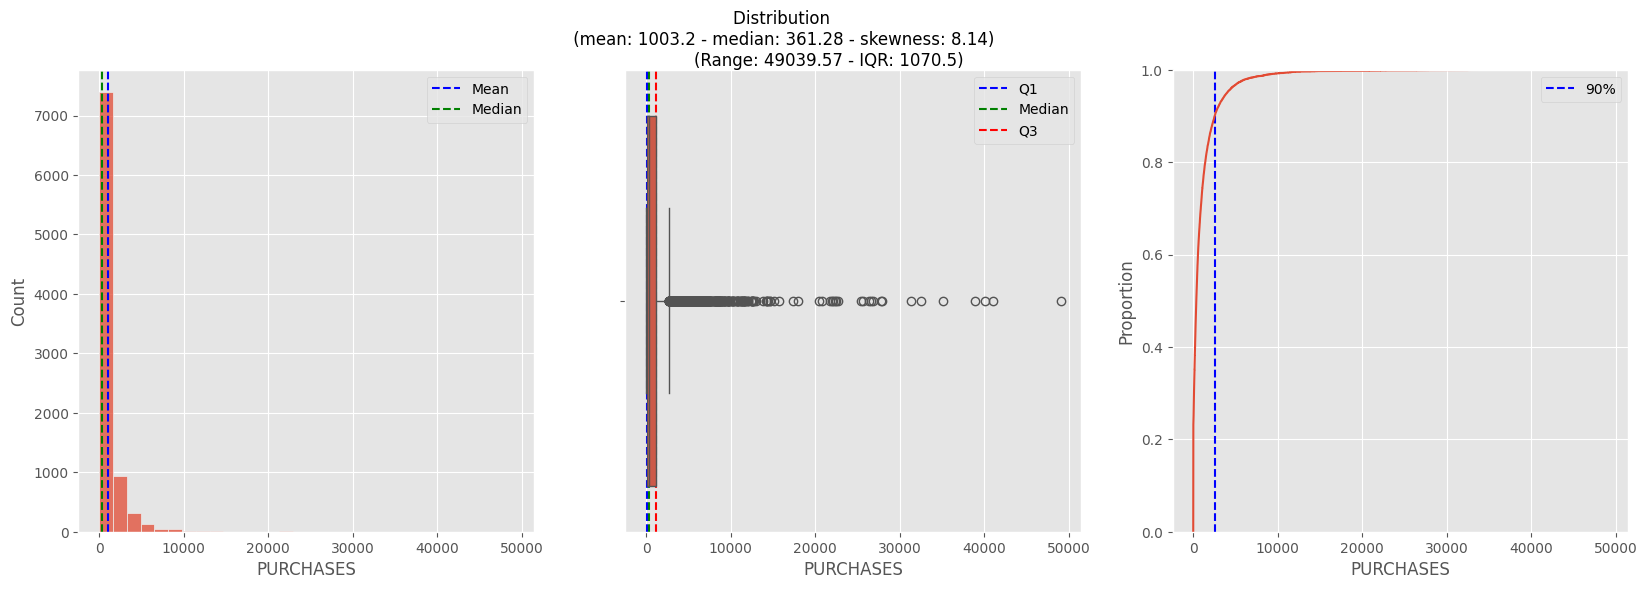

In [35]:
plot_numeric(df, "PURCHASES")

In [36]:
df["PURCHASES"].describe()

count     8950.000000
mean      1003.204834
std       2136.634782
min          0.000000
25%         39.635000
50%        361.280000
75%       1110.130000
max      49039.570000
Name: PURCHASES, dtype: float64

**Summary:**

* According to histograms, the data is extremely right skewed, due to the presence of outliers. So, data transformation is required to avoid bias predictions.
* According to boxplot, there are a lot of outliers.
* The median is the best measure to find the "purchases" average, due to its robustness to asymmetrical data. In this case, the average is USD 361.28.
* Most people have "purchases" between USD 361.28 and USD 1110.13.
* 90% of cases are below than USD 2500.

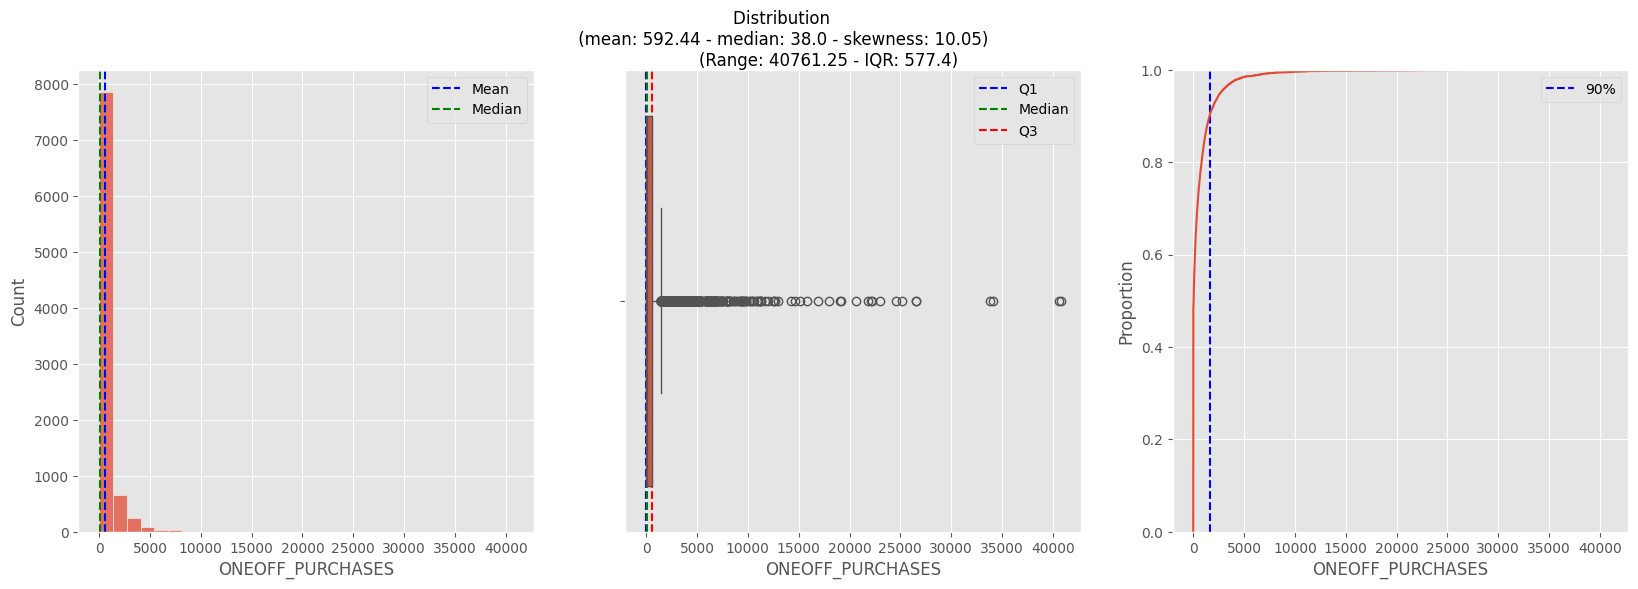

In [39]:
plot_numeric(df, "ONEOFF_PURCHASES")

In [38]:
df["ONEOFF_PURCHASES"].describe()

count     8950.000000
mean       592.437371
std       1659.887917
min          0.000000
25%          0.000000
50%         38.000000
75%        577.405000
max      40761.250000
Name: ONEOFF_PURCHASES, dtype: float64

**Summary:**

* According to histograms, the data is extremely right skewed, due to the presence of outliers. So, data transformation is required to avoid bias predictions.
* According to boxplot, there are a lot of outliers.
* The median is the best measure to find the "one-off purchases" average, due to its robustness to asymmetrical data. In this case, the average is USD 38.
* Most people made "one-off purchases" between USD 38 and USD 577.40.
* 90% of cases are below than USD 1600.

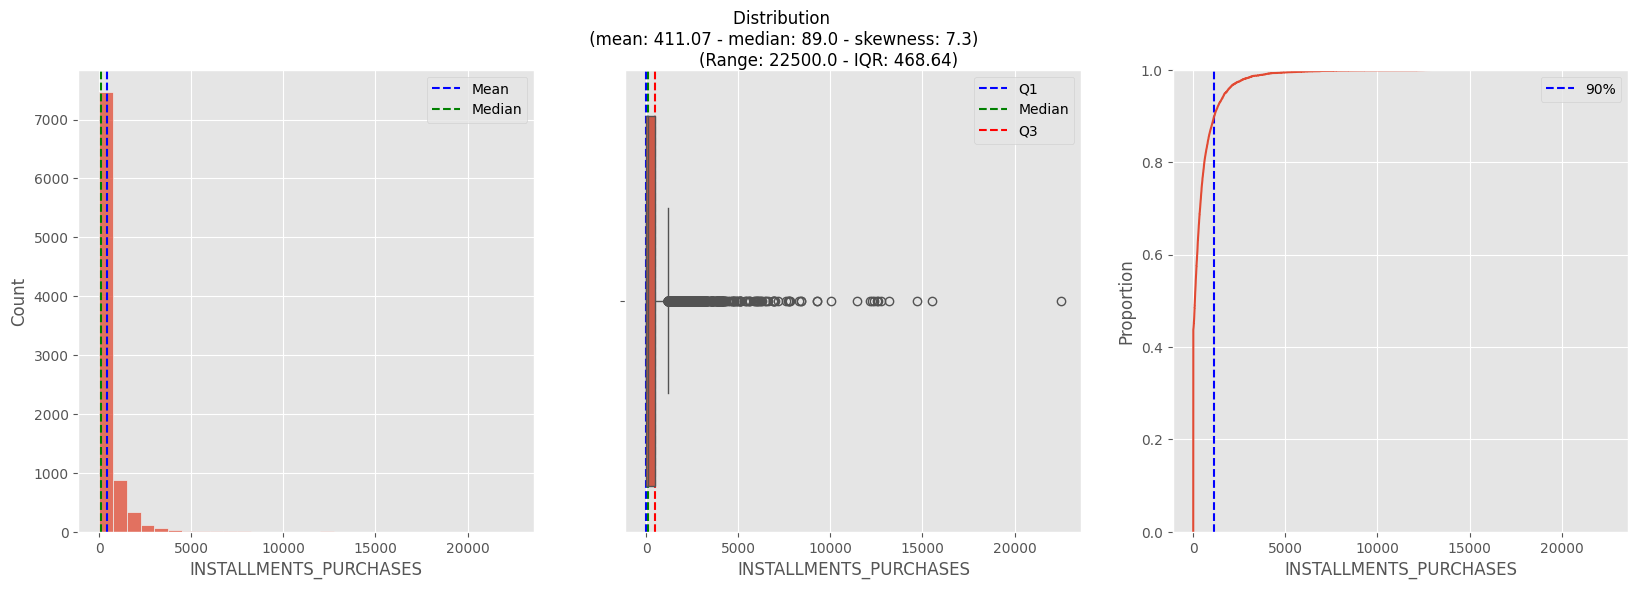

In [41]:
plot_numeric(df, "INSTALLMENTS_PURCHASES")

In [42]:
df["INSTALLMENTS_PURCHASES"].describe()

count     8950.000000
mean       411.067645
std        904.338115
min          0.000000
25%          0.000000
50%         89.000000
75%        468.637500
max      22500.000000
Name: INSTALLMENTS_PURCHASES, dtype: float64

**Summary:**

* According to histograms, the data is extremely right skewed, due to the presence of outliers. So, data transformation is required to avoid bias predictions.
* According to boxplot, there are a lot of outliers.
* The median is the best measure to find the "installment purchases" average, due to its robustness to asymmetrical data. In this case, the average is USD 89.
* Most people made "installment purchases" between USD 89 and USD 468.64.
* 90% of cases are below than USD 1140.

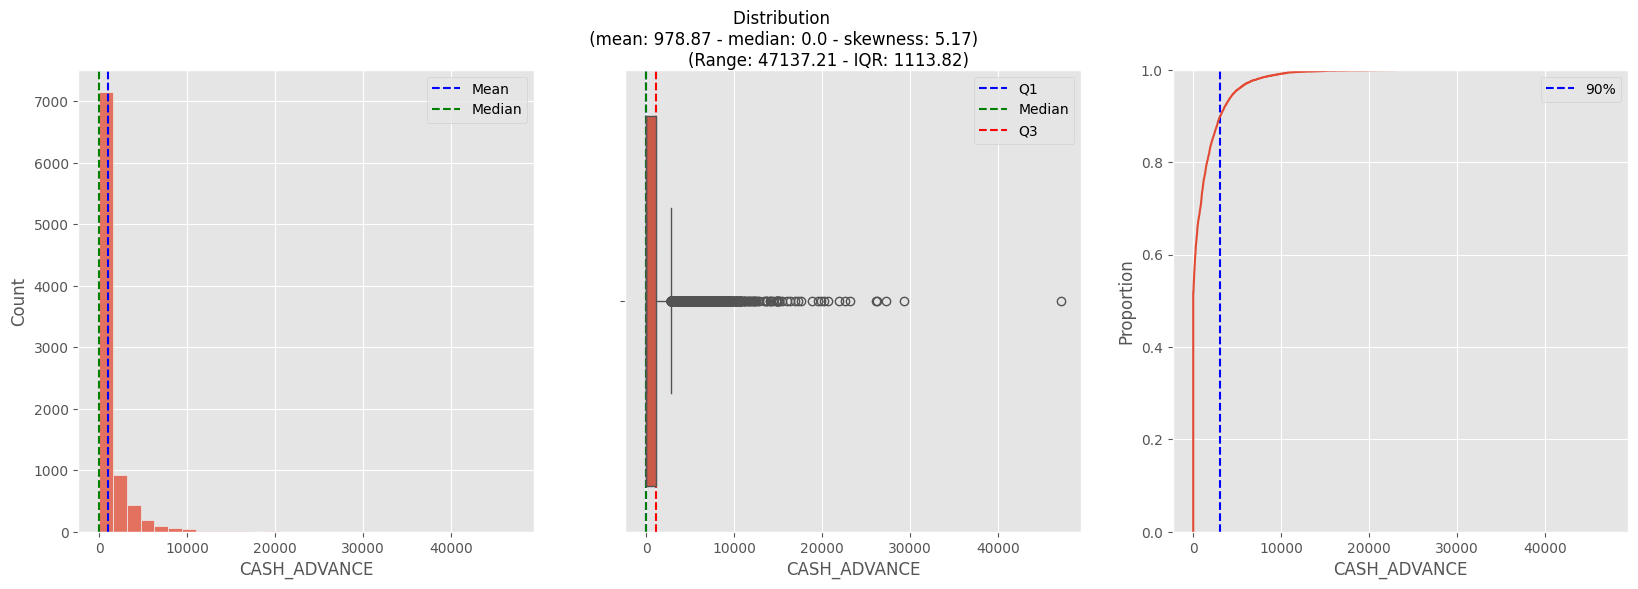

In [44]:
plot_numeric(df, "CASH_ADVANCE")

In [45]:
df["CASH_ADVANCE"].describe()

count     8950.000000
mean       978.871112
std       2097.163877
min          0.000000
25%          0.000000
50%          0.000000
75%       1113.821139
max      47137.211760
Name: CASH_ADVANCE, dtype: float64

**Summary:**

* According to histograms, the data is extremely right skewed, due to the presence of outliers. So, data transformation is required to avoid bias predictions.
* According to boxplot, there are a lot of outliers.
* Half of the cases did not make a cash advance payment.
* People who made a cash advance payment, paid USD 1113.82 approximately.

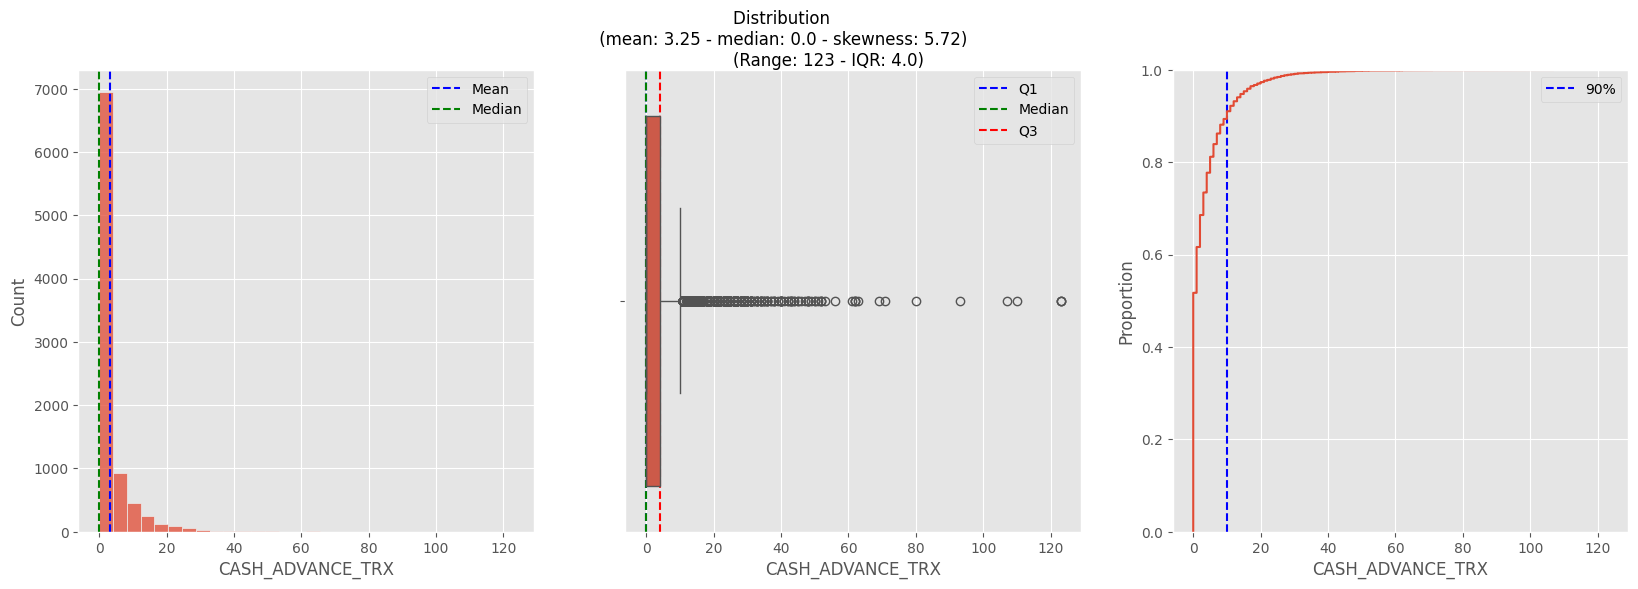

In [46]:
plot_numeric(df, "CASH_ADVANCE_TRX")

In [48]:
df["CASH_ADVANCE_TRX"].describe()

count    8950.000000
mean        3.248827
std         6.824647
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max       123.000000
Name: CASH_ADVANCE_TRX, dtype: float64

**Summary:**

* According to histograms, the data is extremely right skewed, due to the presence of outliers. So, data transformation is required to avoid bias predictions.
* According to boxplot, there are a lot of outliers.
* Half of the cases did not make a cash advance trx payment.
* People who made a cash advance trx payment, paid USD 4 approximately.
* 90% of people made a cash advance trx payment, paid USD 10 approximately.

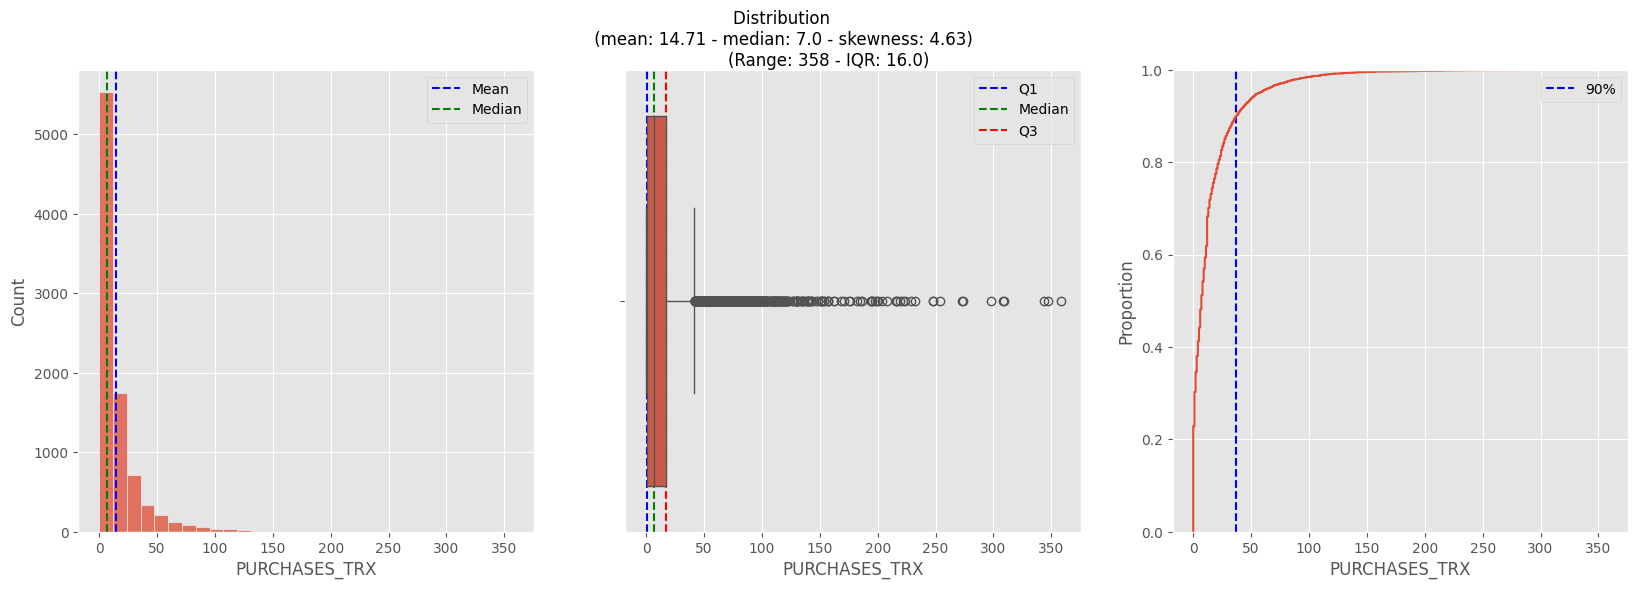

In [52]:
plot_numeric(df, "PURCHASES_TRX")

In [51]:
df["PURCHASES_TRX"].describe()

count    8950.000000
mean       14.709832
std        24.857649
min         0.000000
25%         1.000000
50%         7.000000
75%        17.000000
max       358.000000
Name: PURCHASES_TRX, dtype: float64

**Summary:**

* According to histograms, the data is extremely right skewed, due to the presence of outliers. So, data transformation is required to avoid bias predictions.
* According to boxplot, there are a lot of outliers.
* Half of the cases made a purchase trx of USD 7 approximately.
* Most people made "purchase trx" between USD 7 and USD 17.
* 90% of people, who made a "purchase trx", paid USD 37 approximately.

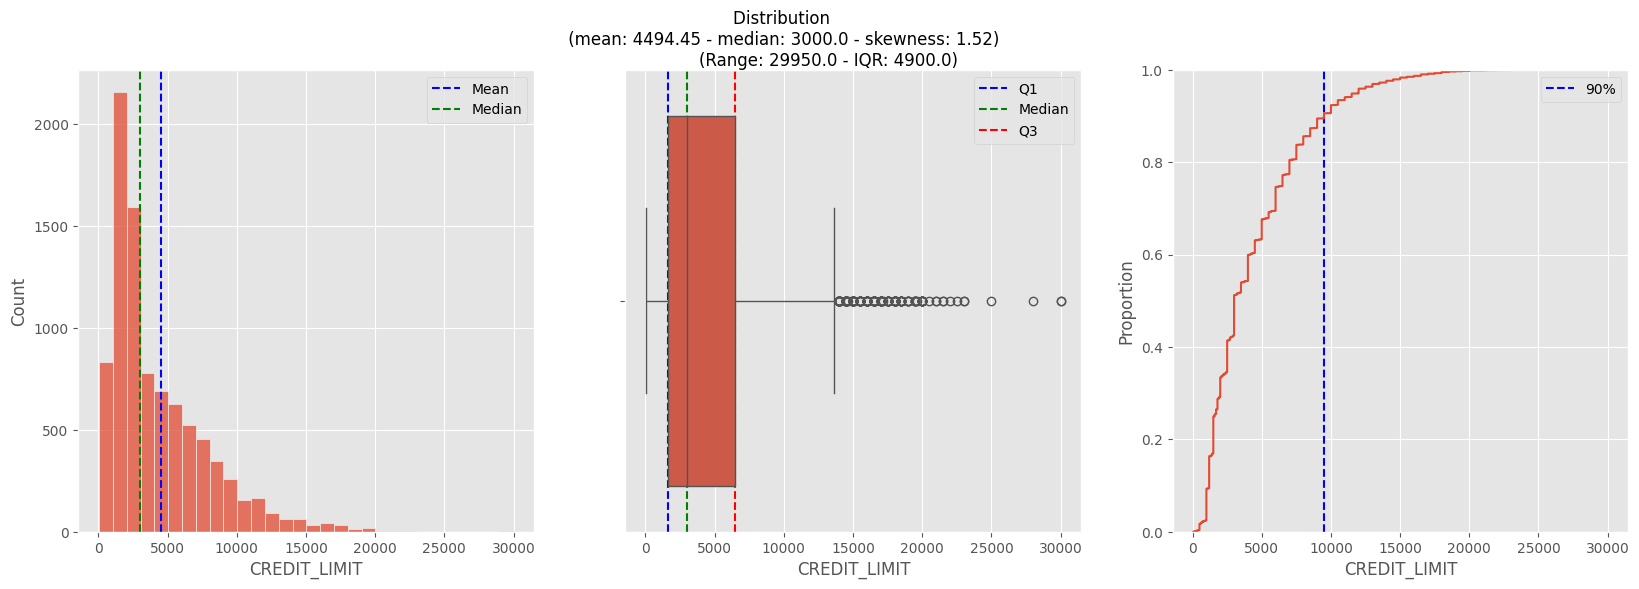

In [53]:
plot_numeric(df, "CREDIT_LIMIT")

In [55]:
df["CREDIT_LIMIT"].describe()

count     8950.000000
mean      4494.449450
std       3638.612411
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

**Summary:**

* According to histograms, the data is right skewed, due to the presence of outliers. So, data transformation is required to avoid bias predictions.
* According to boxplot, there are several outliers.
* Half of the cases had a credit limit of USD 3000.
* Most people had a credit limit between USD 3000 and USD 6500.
* 90% of people had a credit limit of USD 9500.

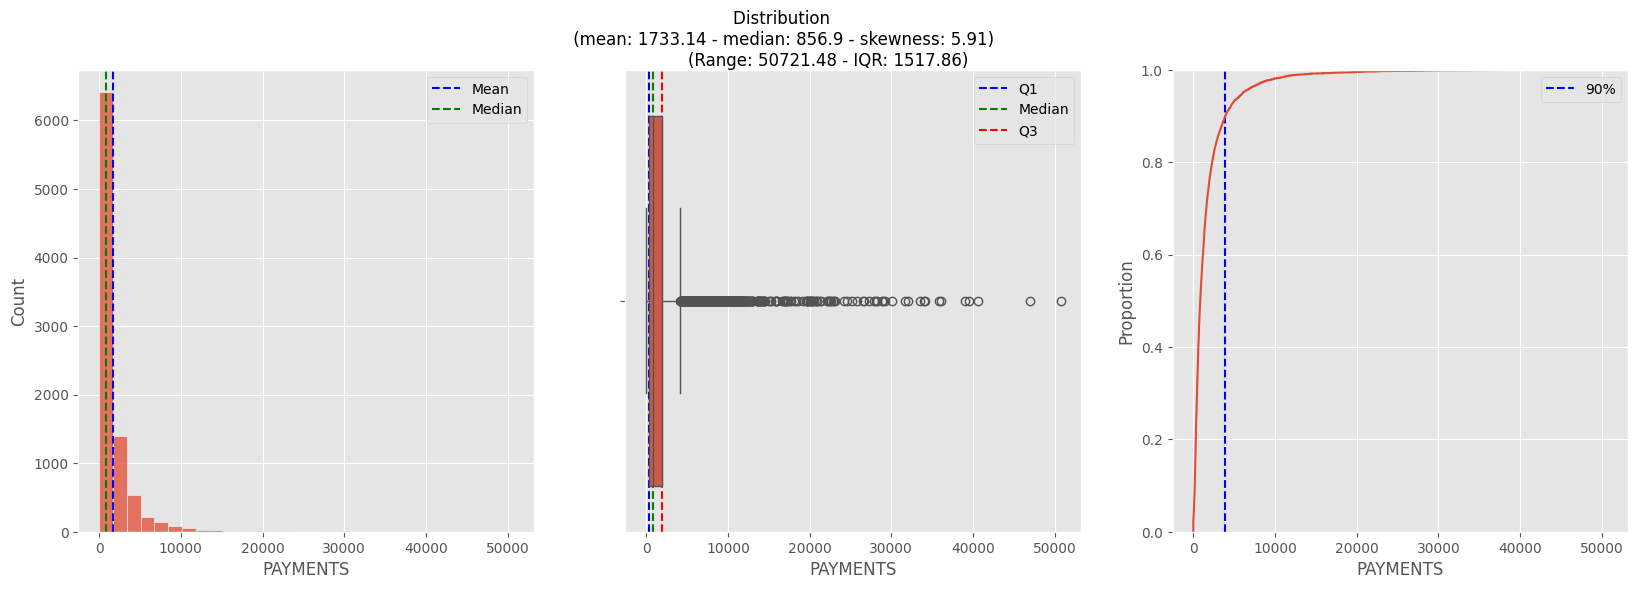

In [56]:
plot_numeric(df, "PAYMENTS")

In [58]:
df["PAYMENTS"].describe()

count     8950.000000
mean      1733.143852
std       2895.063757
min          0.000000
25%        383.276166
50%        856.901546
75%       1901.134317
max      50721.483360
Name: PAYMENTS, dtype: float64

**Summary:**

* According to histograms, the data is extremely right skewed, due to the presence of outliers. So, data transformation is required to avoid bias predictions.
* According to boxplot, there are a lot of outliers.
* Half of the cases made a payment of up to USD 856.90.
* Most people made a payment between USD 856.90 and USD 1901.13.
* 90% of people made a payment of up to USD 3923.

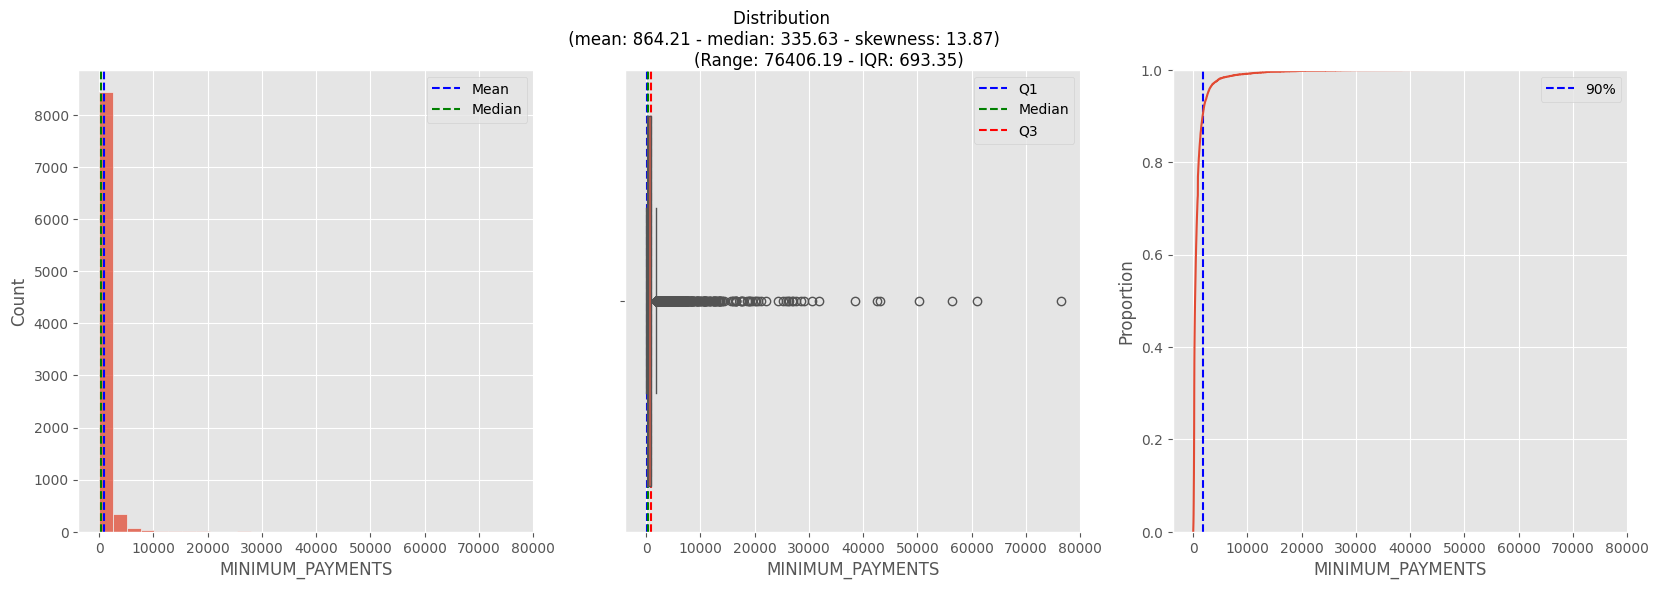

In [59]:
plot_numeric(df, "MINIMUM_PAYMENTS")

In [61]:
df["MINIMUM_PAYMENTS"].describe()

count     8950.000000
mean       864.206542
std       2330.588021
min          0.019163
25%        170.857654
50%        335.628312
75%        864.206542
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

**Summary:**

* According to histograms, the data is extremely right skewed, due to the presence of outliers. So, data transformation is required to avoid bias predictions.
* According to boxplot, there are a lot of outliers.
* Half of the cases made a minimum payment of up to USD 335.63.
* Most people made a minimum payment between USD 335.63 and USD 864.20.
* 90% of people made a minimum payment of up to USD 1732.69.

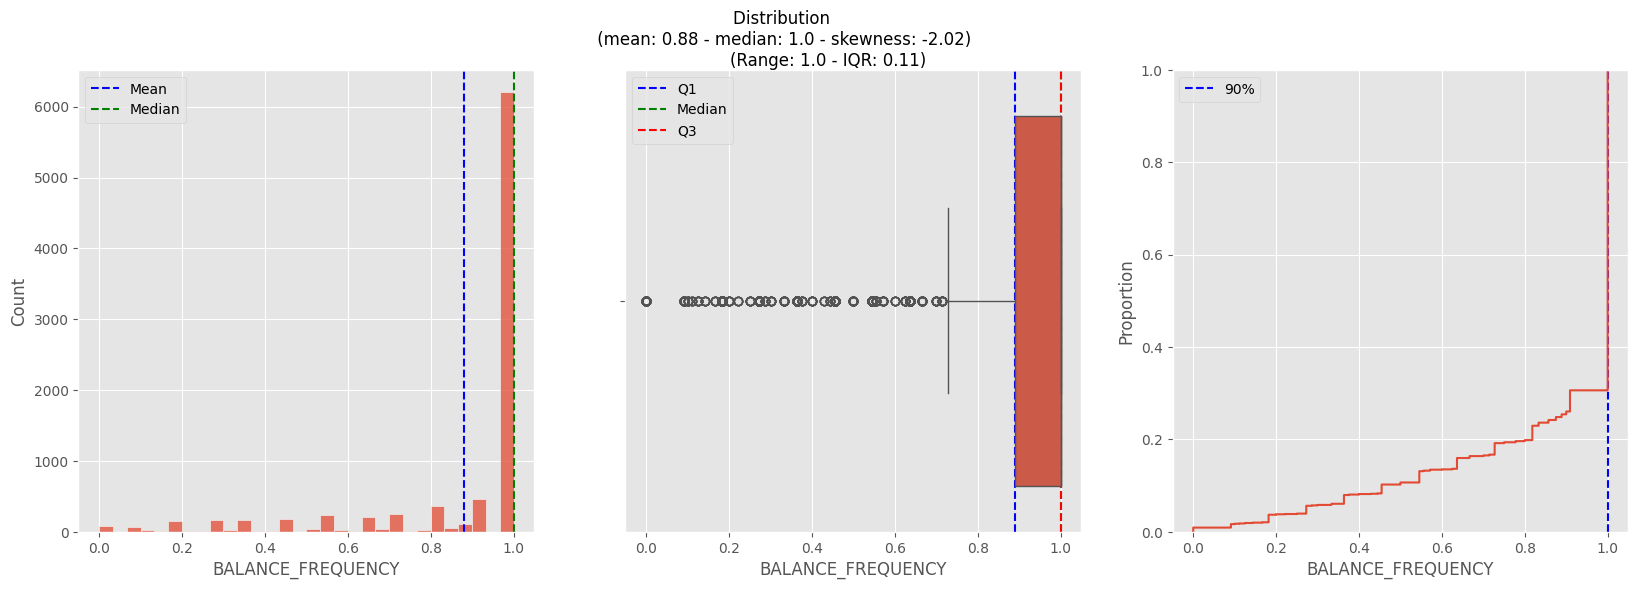

In [63]:
plot_numeric(df, "BALANCE_FREQUENCY")

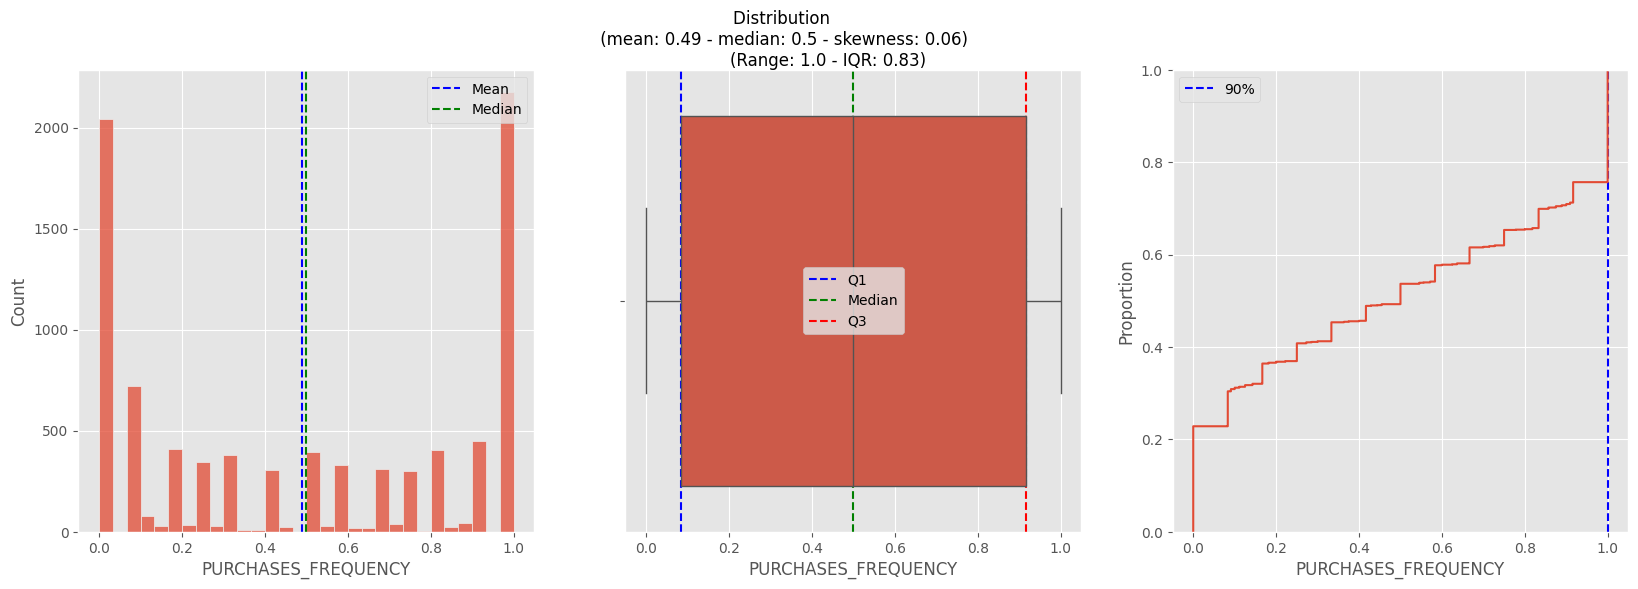

In [64]:
plot_numeric(df, "PURCHASES_FREQUENCY")

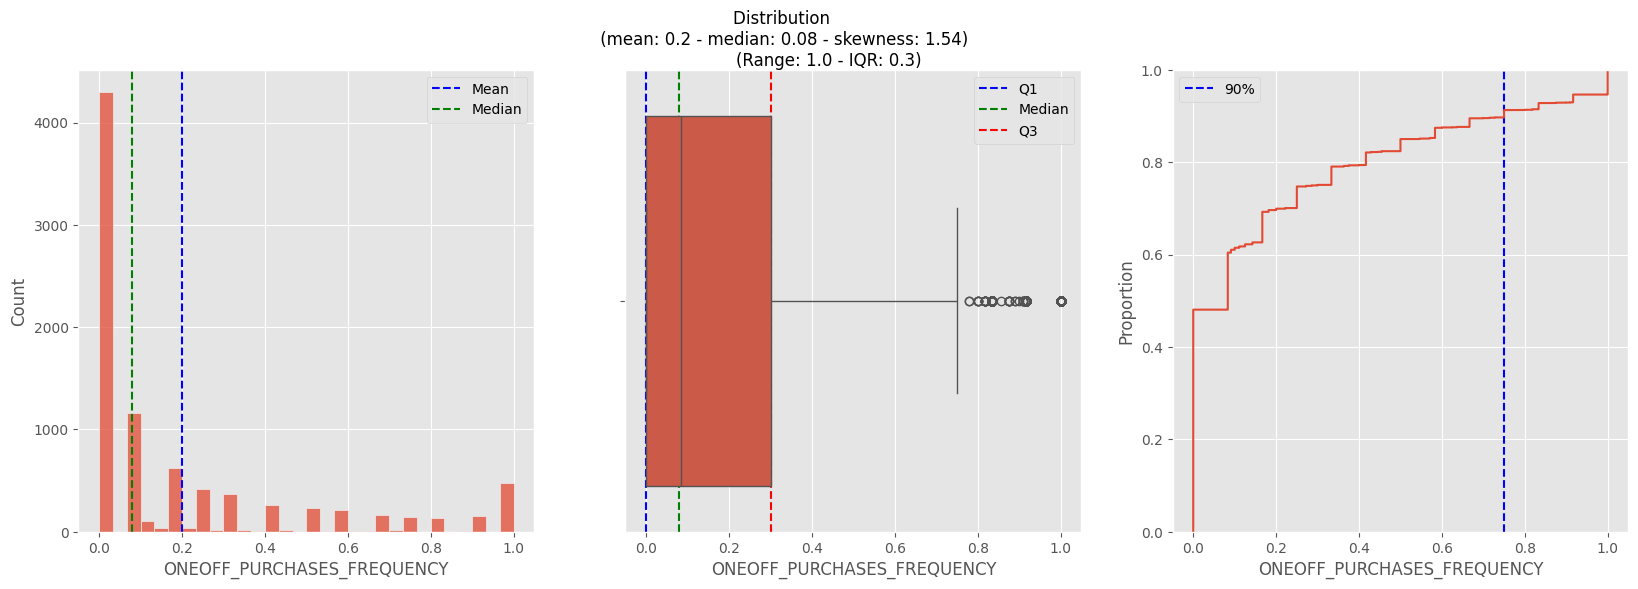

In [65]:
plot_numeric(df, "ONEOFF_PURCHASES_FREQUENCY")

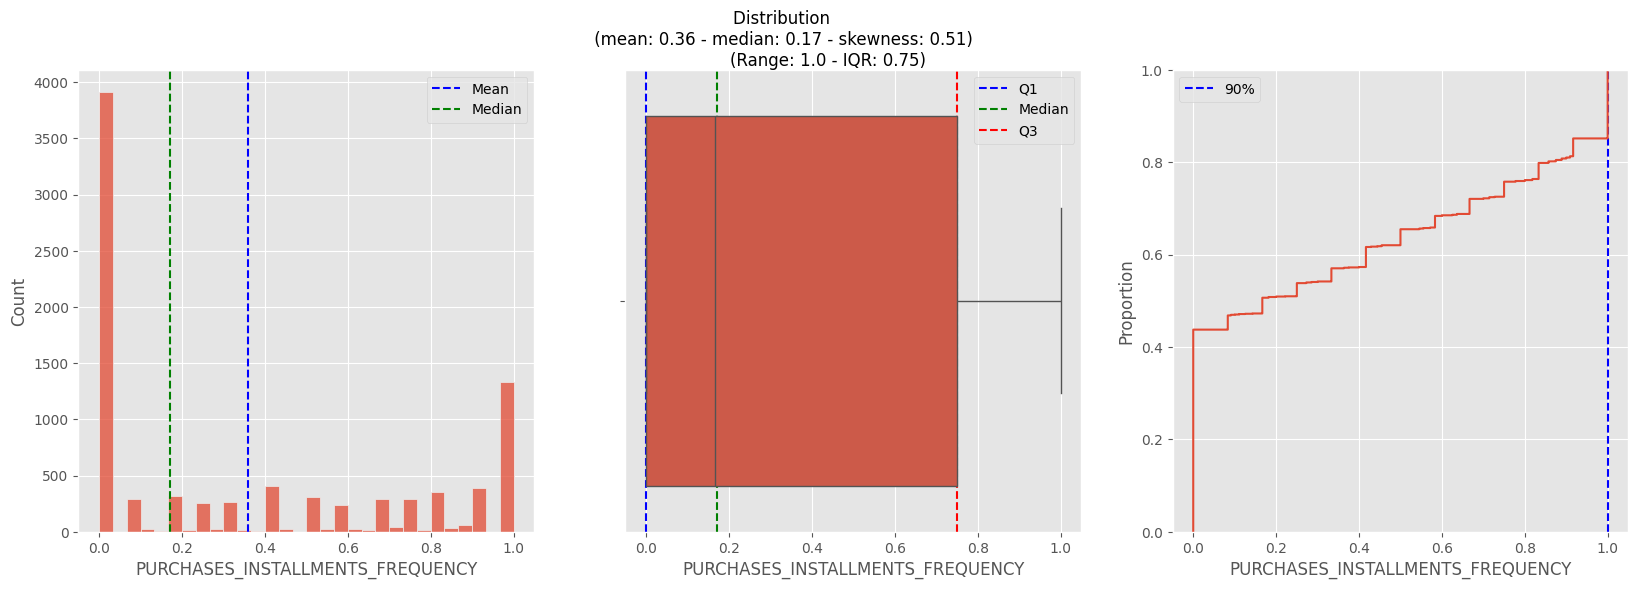

In [66]:
plot_numeric(df, "PURCHASES_INSTALLMENTS_FREQUENCY")

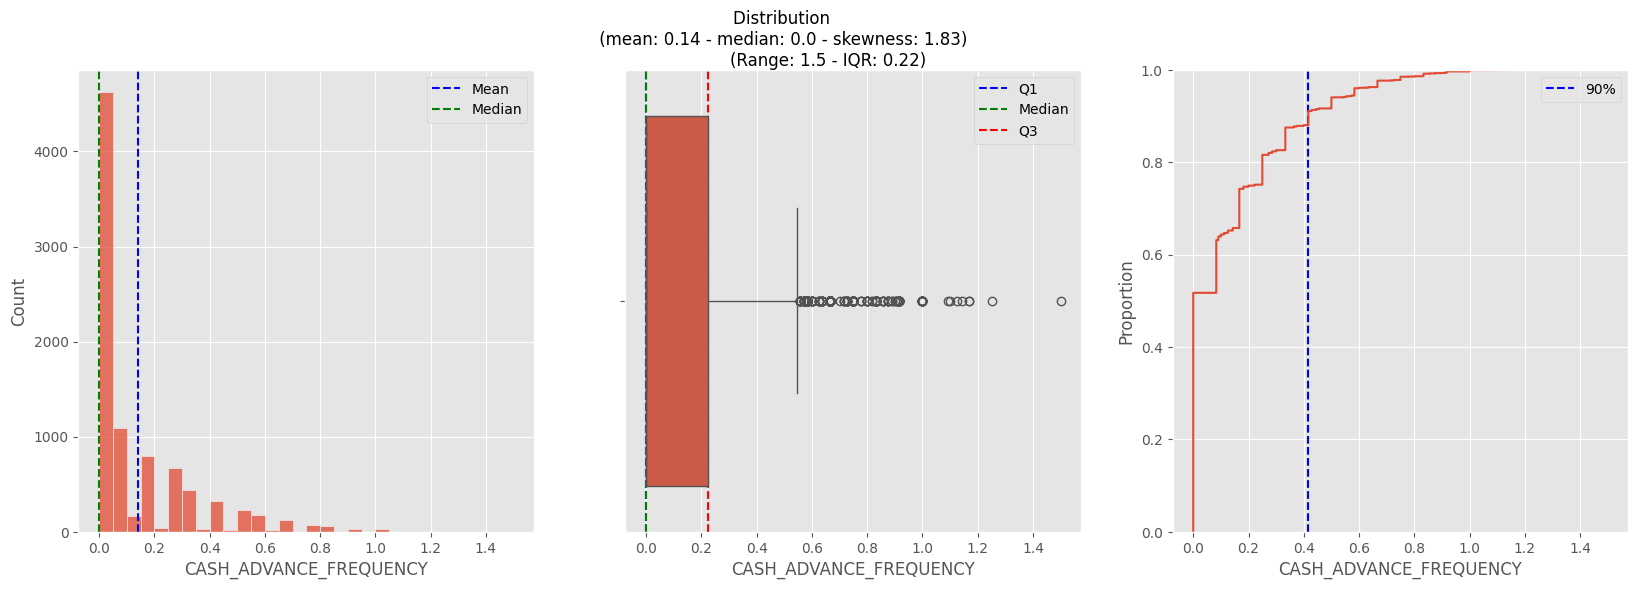

In [67]:
plot_numeric(df, "CASH_ADVANCE_FREQUENCY")

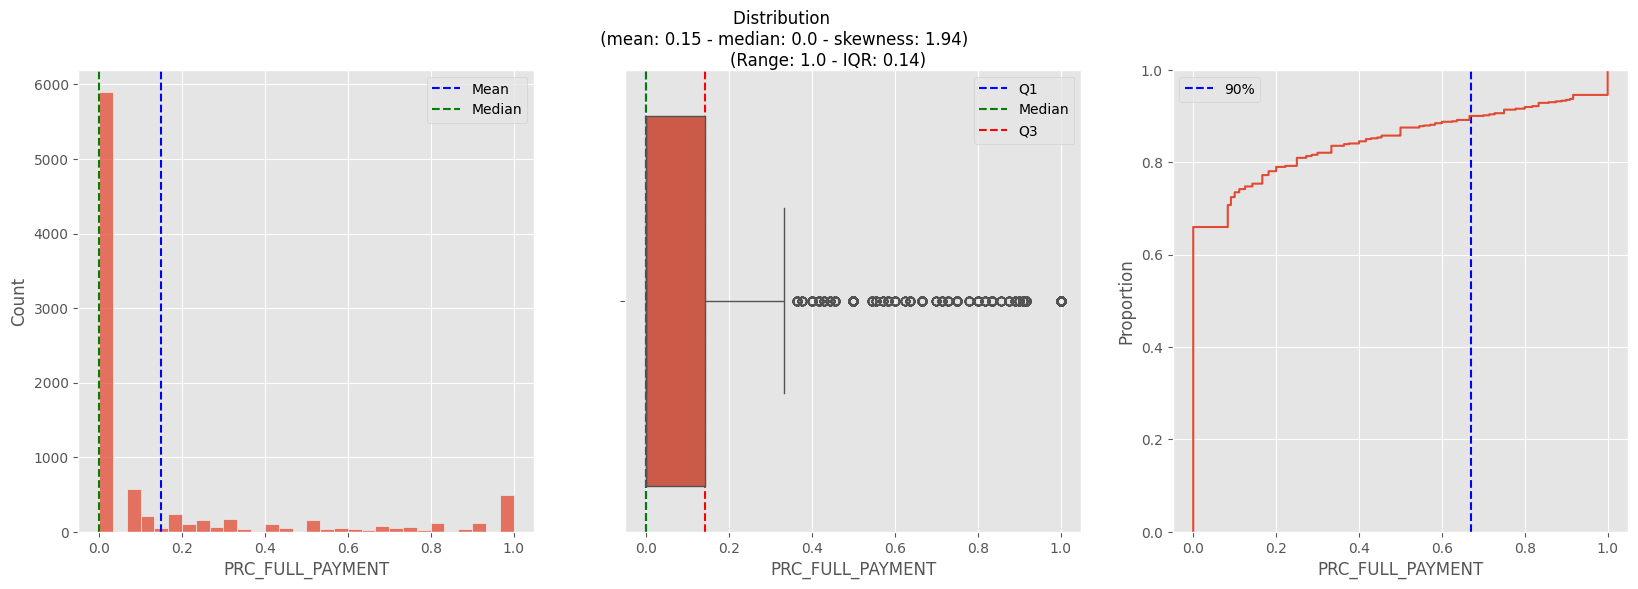

In [68]:
plot_numeric(df, "PRC_FULL_PAYMENT")

**Summary:**

* aaaa

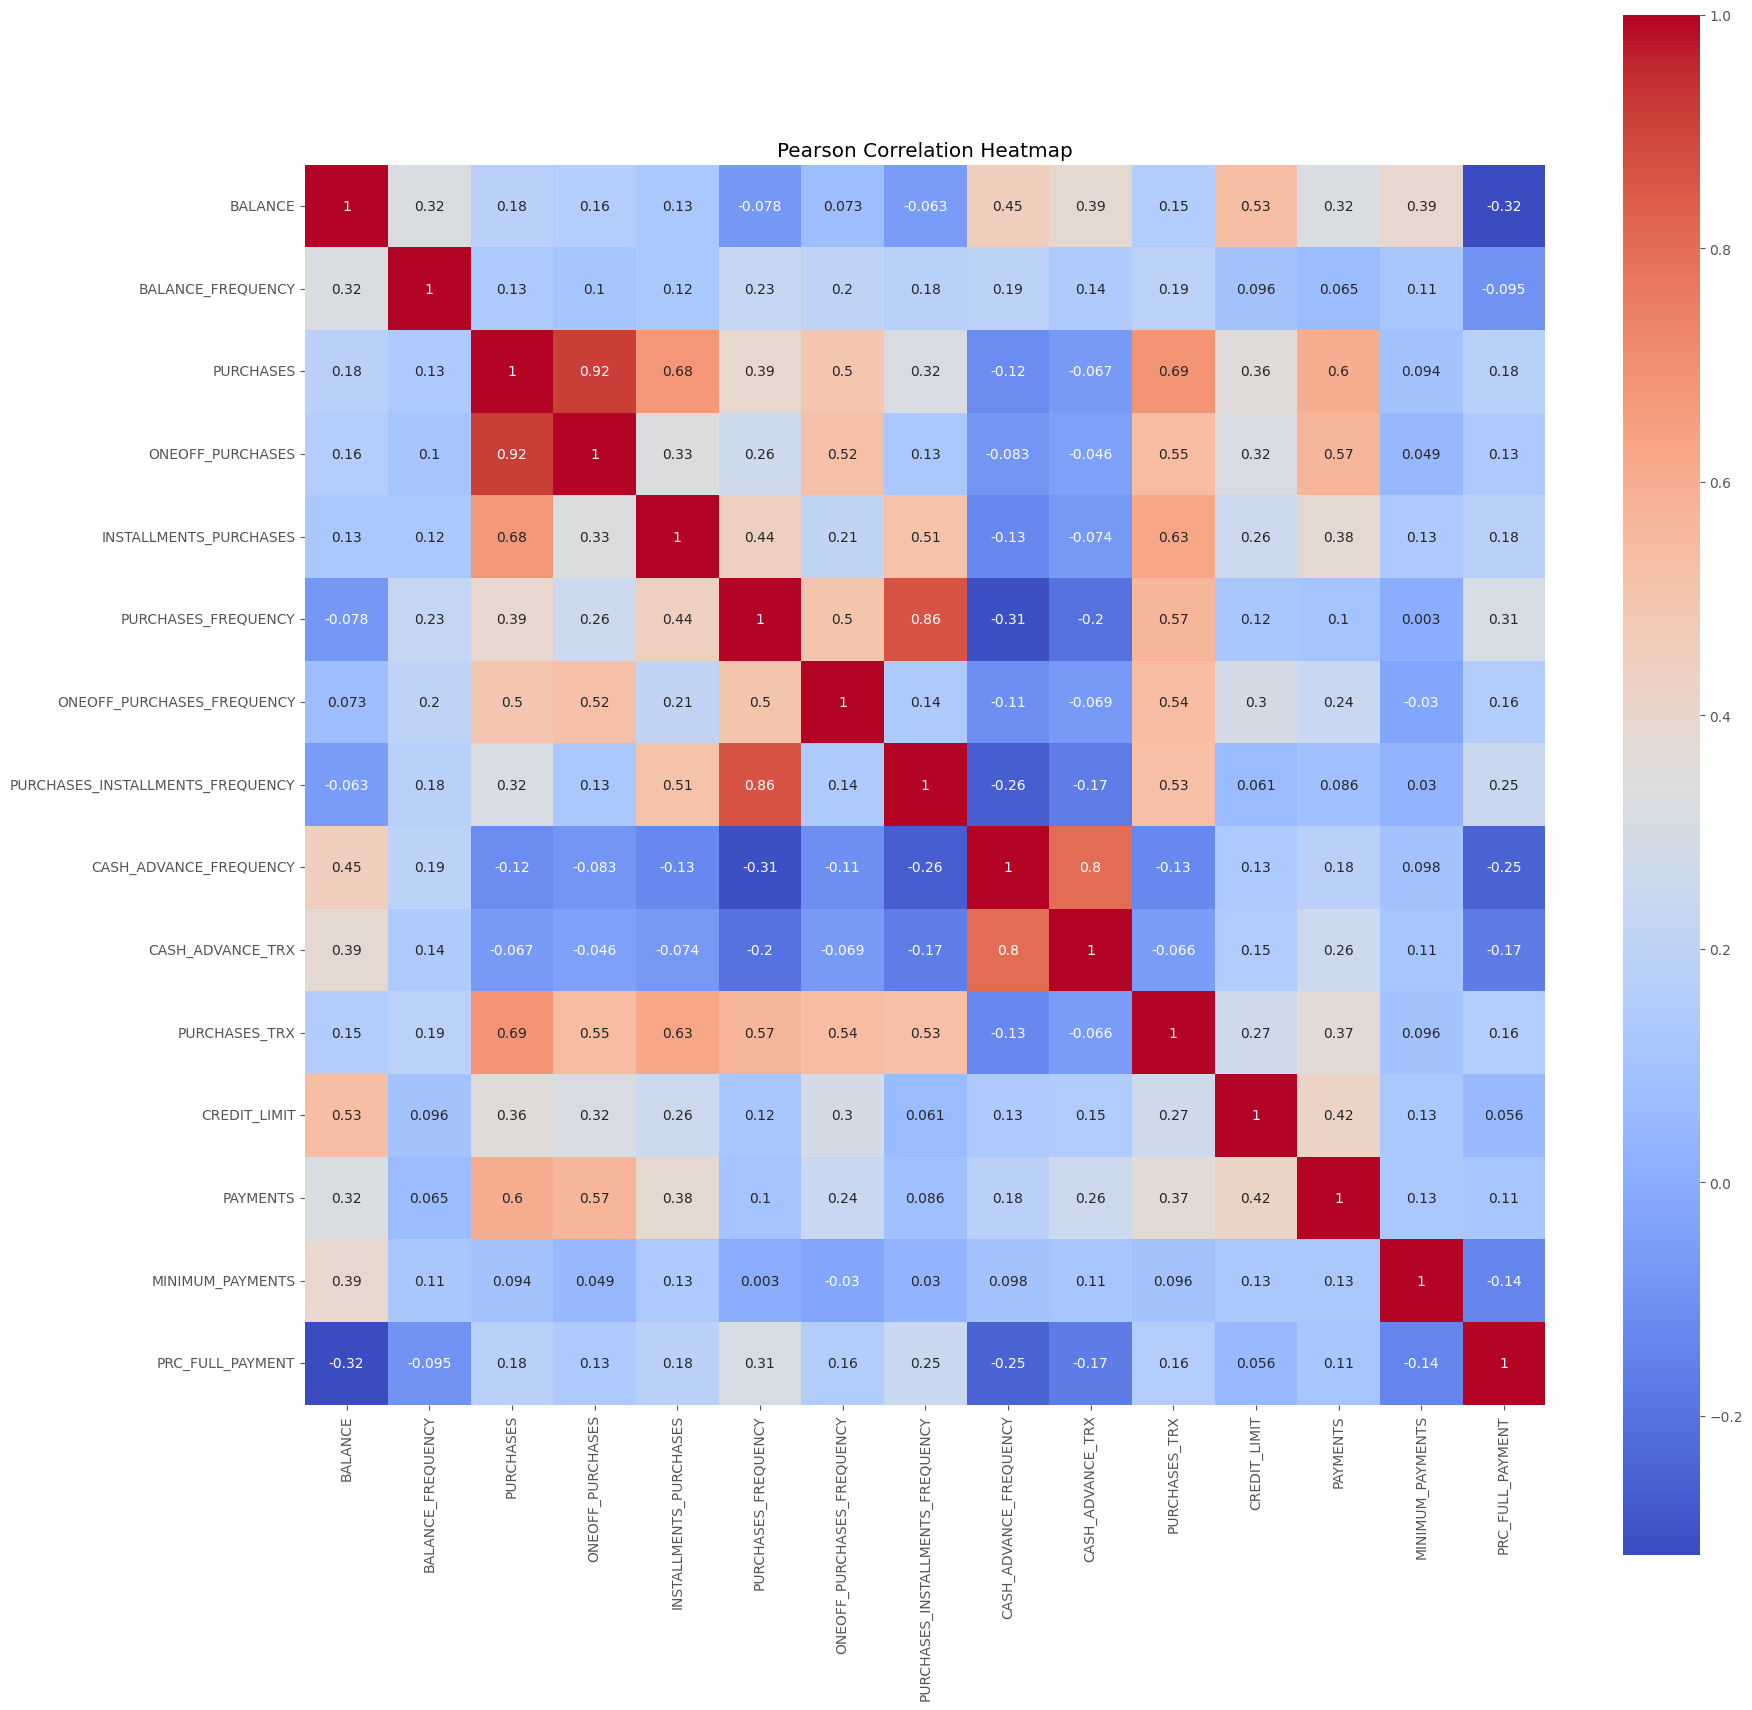

In [59]:
correlation_matrix = df[numeric_features].corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", square = True)
plt.title("Pearson Correlation Heatmap")
plt.show()

In [60]:
def plot_scatter(df, variable_name_1, variable_name_2):
    plt.figure(figsize = (12, 6))
    sns.scatterplot(data = df, x = variable_name_1, y = variable_name_2)
    plt.title("Relationship")
    plt.show()

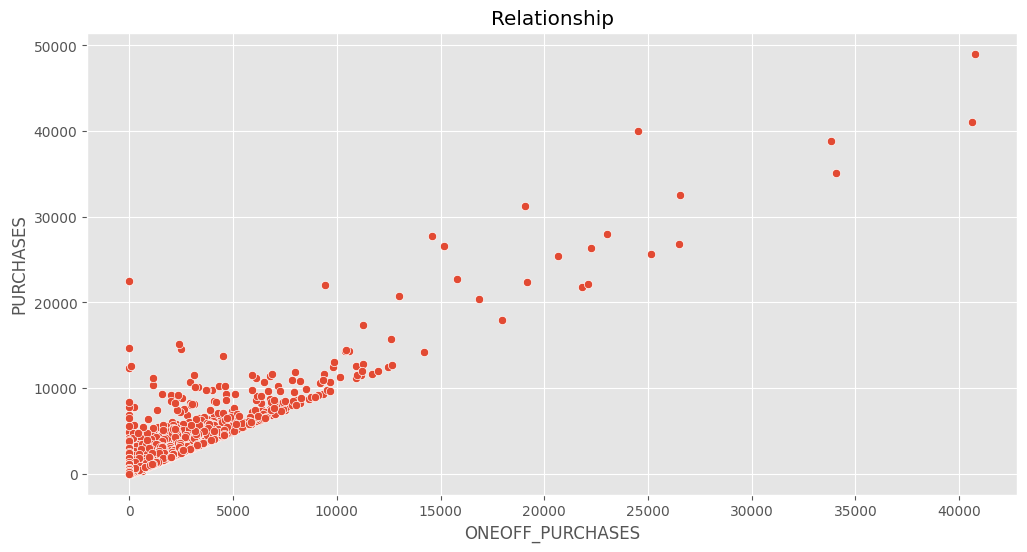

In [61]:
plot_scatter(df, "ONEOFF_PURCHASES", "PURCHASES")

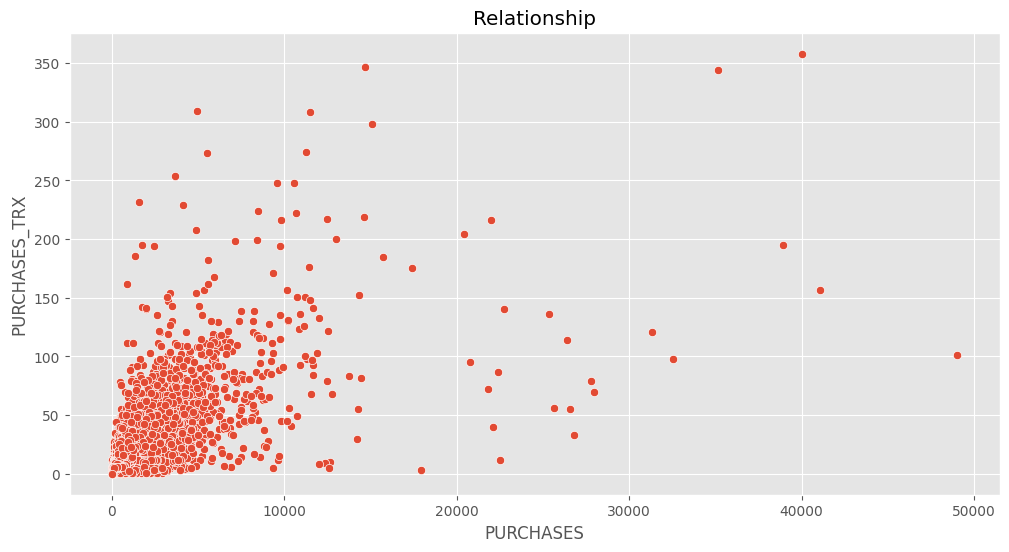

In [62]:
plot_scatter(df, "PURCHASES", "PURCHASES_TRX")

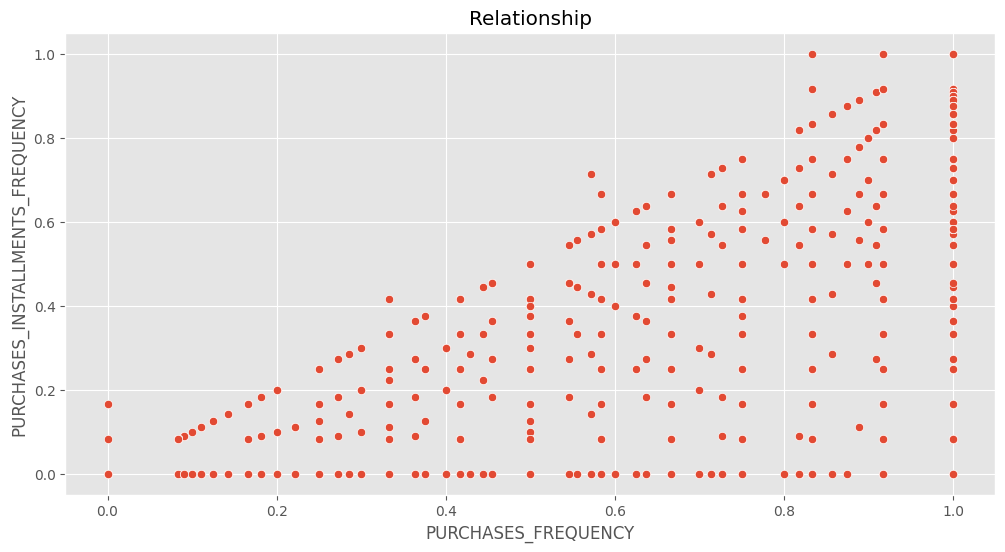

In [65]:
plot_scatter(df, "PURCHASES_FREQUENCY", "PURCHASES_INSTALLMENTS_FREQUENCY")

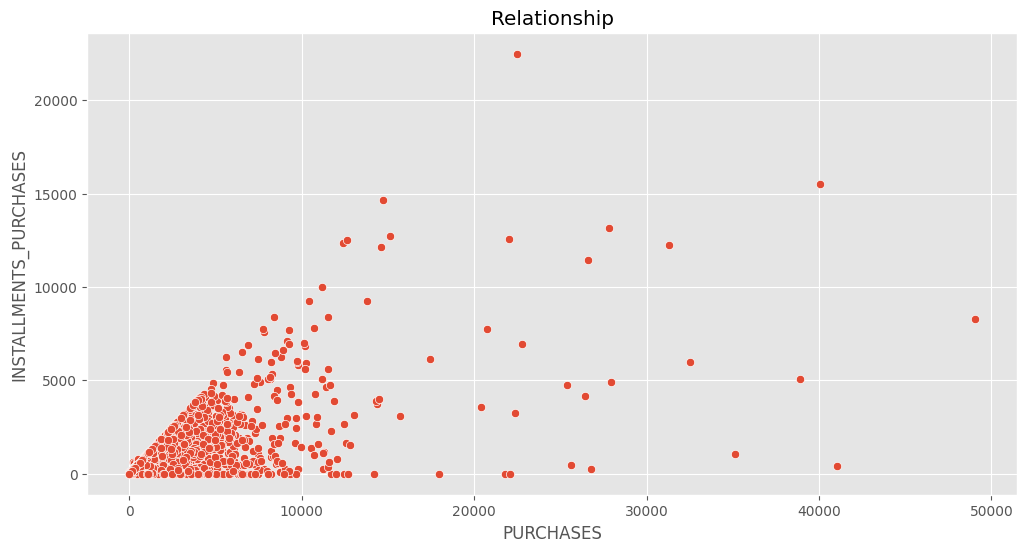

In [66]:
plot_scatter(df, "PURCHASES", "INSTALLMENTS_PURCHASES")

#### 3.3.2. Categorical variables

In [95]:
def create_frequency_table(df, column_name):
    abs_frequency = df[column_name].value_counts().sort_index()
    rel_frequency = abs_frequency / abs_frequency.sum()

    frequency_table = pd.DataFrame({
        "Absolute Frequency": abs_frequency,
        "Relative Frequency": rel_frequency.round(3)
    })

    total_row = pd.DataFrame({
        "Absolute Frequency": [abs_frequency.sum()],
        "Relative Frequency": [rel_frequency.sum()]
    }, index=["Total"])

    frequency_table = pd.concat([frequency_table, total_row])
    return frequency_table

In [97]:
frequency_table = create_frequency_table(df, "TENURE")
frequency_table

,Absolute Frequency,Relative Frequency
6,204,0.023
7,190,0.021
8,196,0.022
9,175,0.020
10,236,0.026
11,365,0.041
12,7584,0.847
Total,8950,1.000


In [55]:
def plot_categorical(df, variable_name):
    plt.figure(figsize = (12, 6))
    sns.countplot(y = variable_name, data = df, order = df[variable_name].value_counts().index)
    plt.title("Frequency diagram")
    plt.xlabel("Frequencies")
    plt.show()

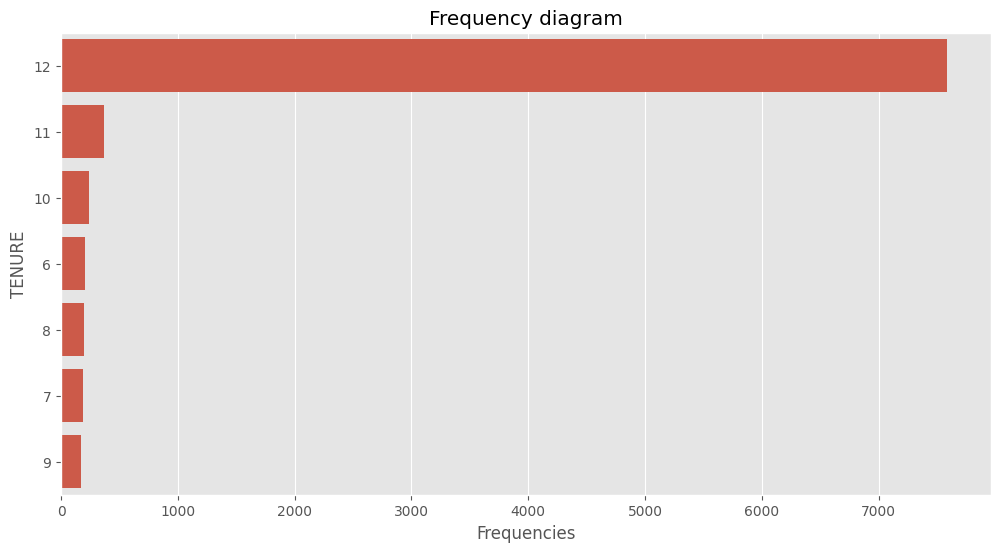

In [56]:
plot_categorical(df, "TENURE")

#### 3.3.2. After transformation

In [31]:
from sklearn.preprocessing import StandardScaler

In [54]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df.values)
df_scaled = pd.DataFrame(data = x_scaled, columns = list(df.columns))
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,-2.540488e-17,1.000056,-0.751640,-0.690008,-0.332029,2.352559e-01,8.397489
BALANCE_FREQUENCY,8950.0,1.587805e-16,1.000056,-3.703271,0.049045,0.518084,5.180838e-01,0.518084
PURCHASES,8950.0,3.175610e-18,1.000056,-0.469552,-0.451001,-0.300454,5.004652e-02,22.483510
ONEOFF_PURCHASES,8950.0,-6.033659e-17,1.000056,-0.356934,-0.356934,-0.334040,-9.056763e-03,24.201066
INSTALLMENTS_PURCHASES,8950.0,3.175610e-17,1.000056,-0.454576,-0.454576,-0.356156,6.366321e-02,24.426889
CASH_ADVANCE,8950.0,-6.351220e-18,1.000056,-0.466786,-0.466786,-0.466786,6.435242e-02,22.011117
PURCHASES_FREQUENCY,8950.0,9.328354e-17,1.000056,-1.221758,-1.014125,0.024043,1.062211e+00,1.269843
ONEOFF_PURCHASES_FREQUENCY,8950.0,1.905366e-17,1.000056,-0.678661,-0.678661,-0.399319,3.269728e-01,2.673451
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,5.716098e-17,1.000056,-0.916995,-0.916995,-0.497629,9.701506e-01,1.599199
CASH_ADVANCE_FREQUENCY,8950.0,-1.595744e-16,1.000056,-0.675349,-0.675349,-0.675349,4.351492e-01,6.820521


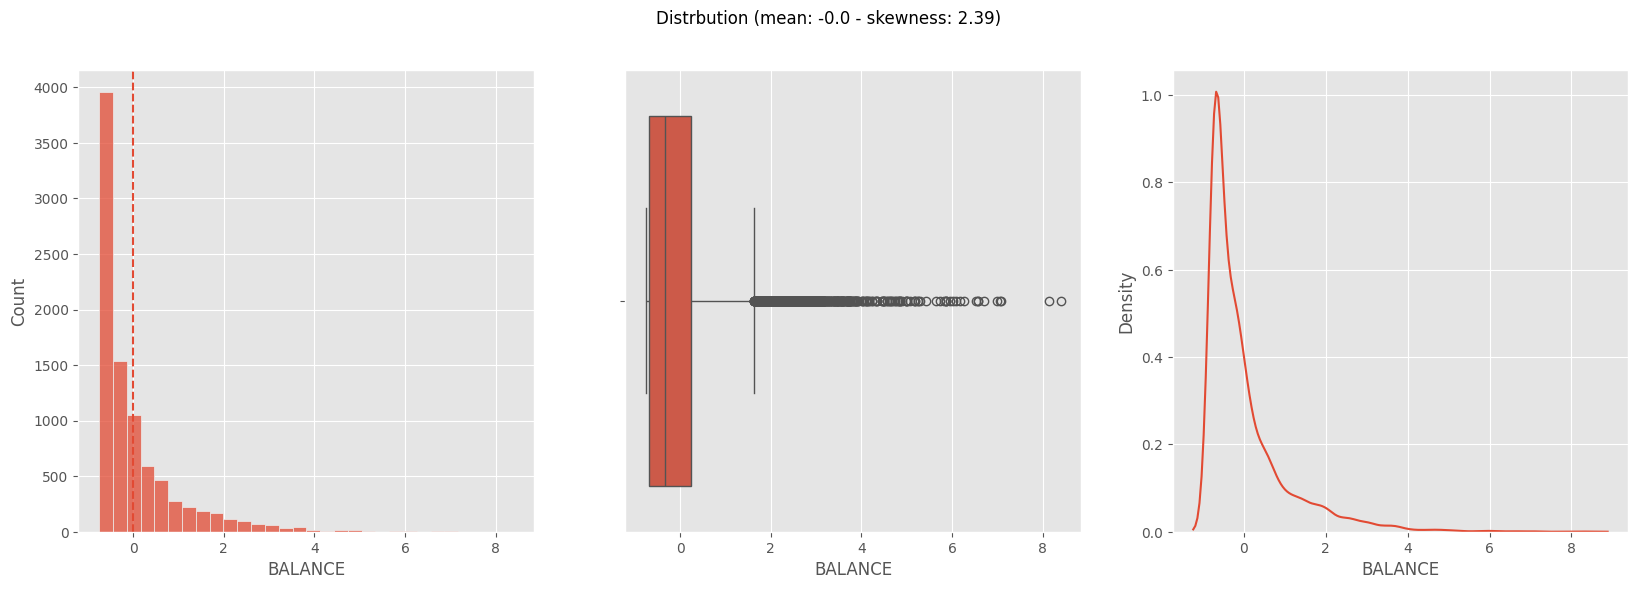

In [55]:
plot_numeric(df_scaled, "BALANCE")

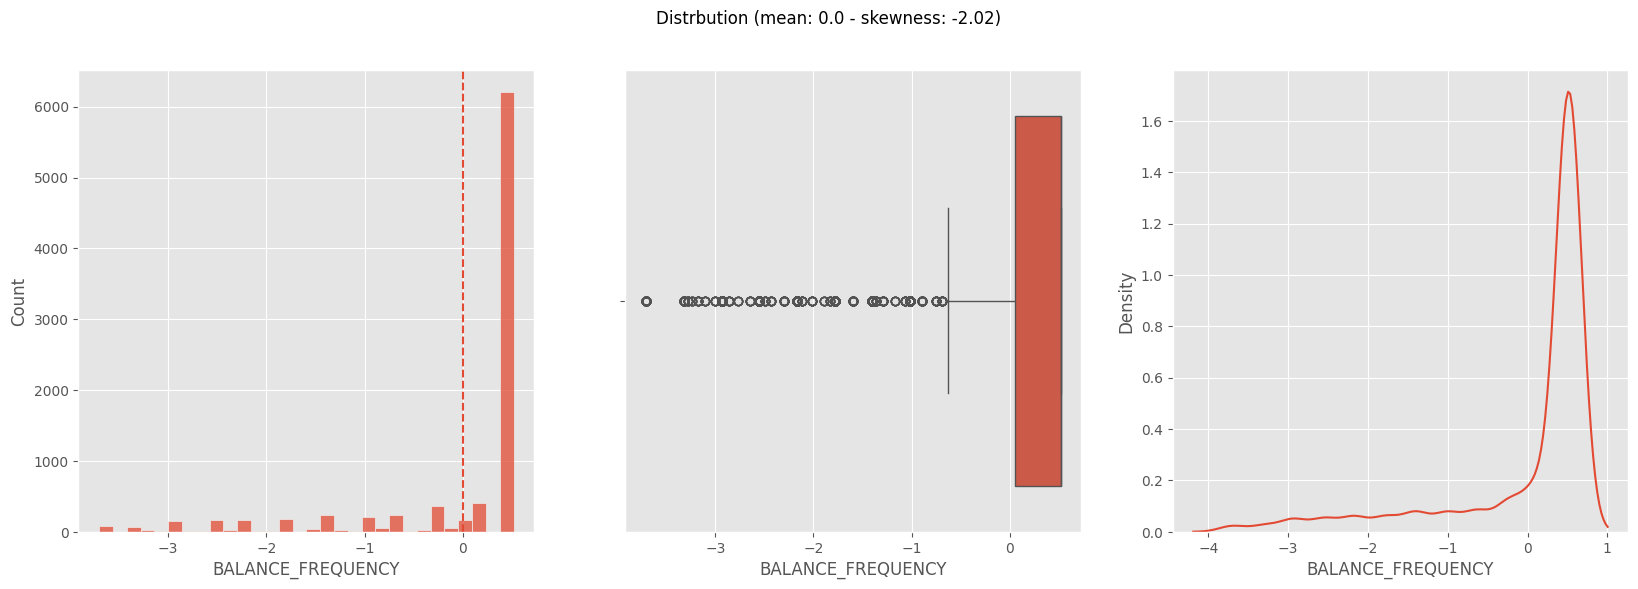

In [56]:
plot_numeric(df_scaled, "BALANCE_FREQUENCY")

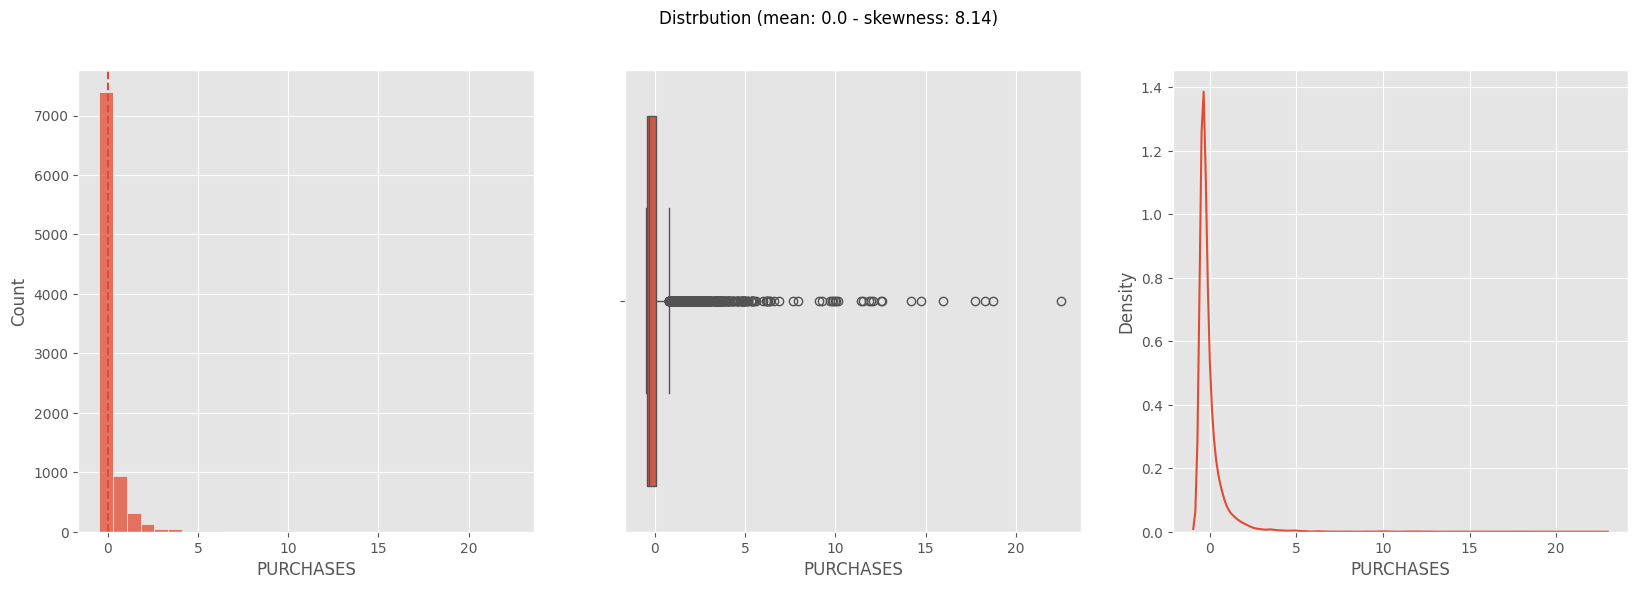

In [57]:
plot_numeric(df_scaled, "PURCHASES")

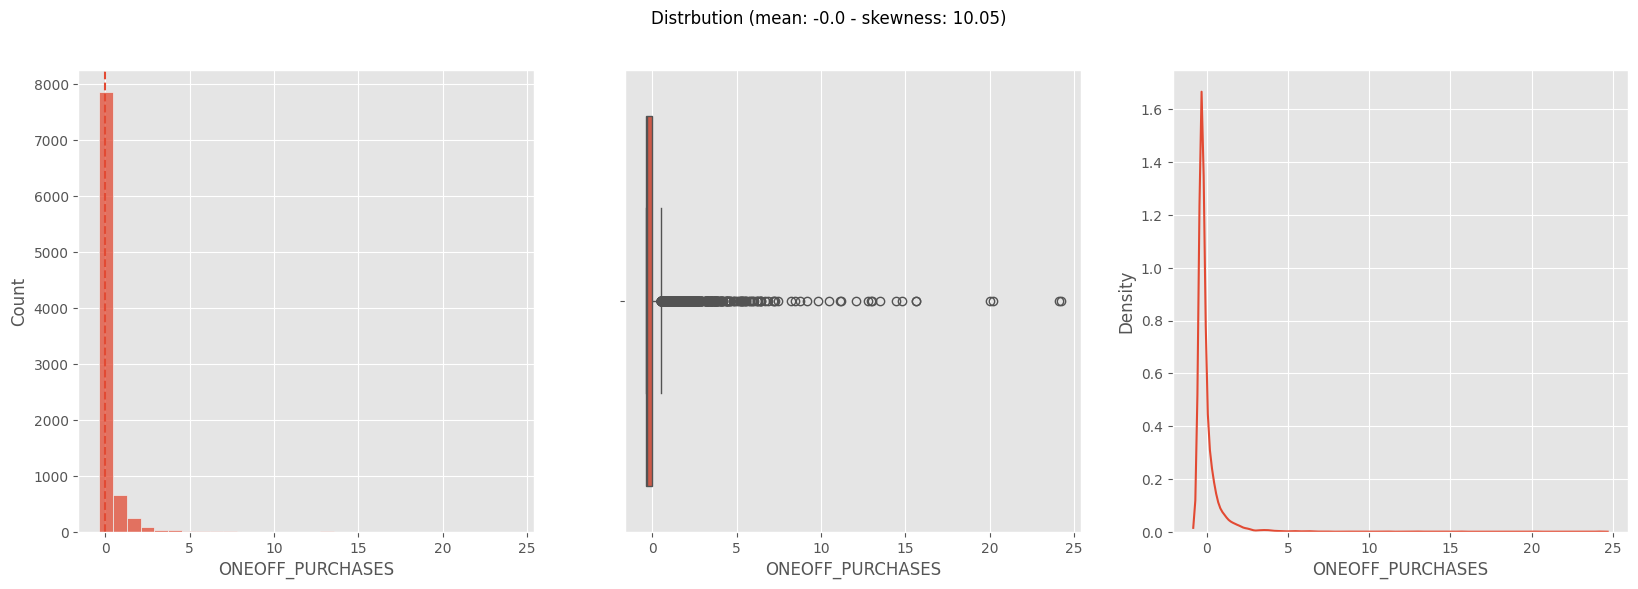

In [58]:
plot_numeric(df_scaled, "ONEOFF_PURCHASES")

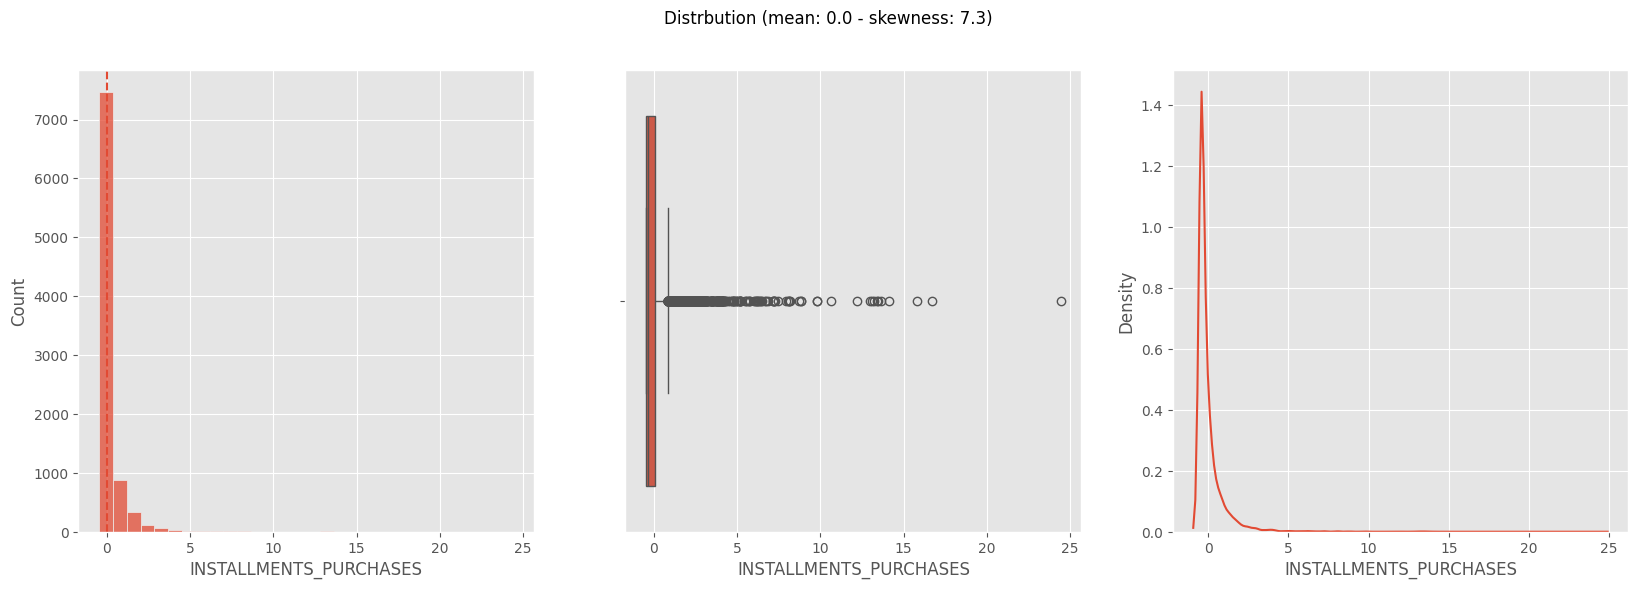

In [59]:
plot_numeric(df_scaled, "INSTALLMENTS_PURCHASES")

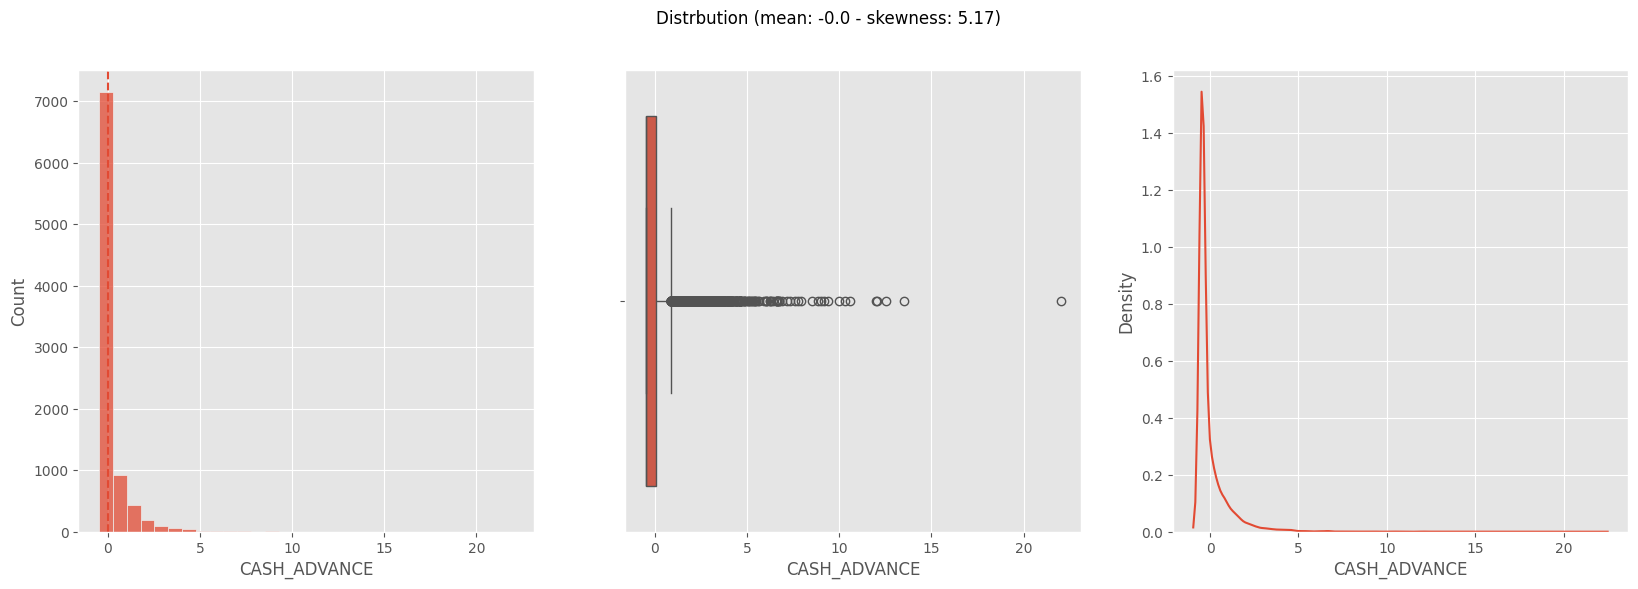

In [60]:
plot_numeric(df_scaled, "CASH_ADVANCE")

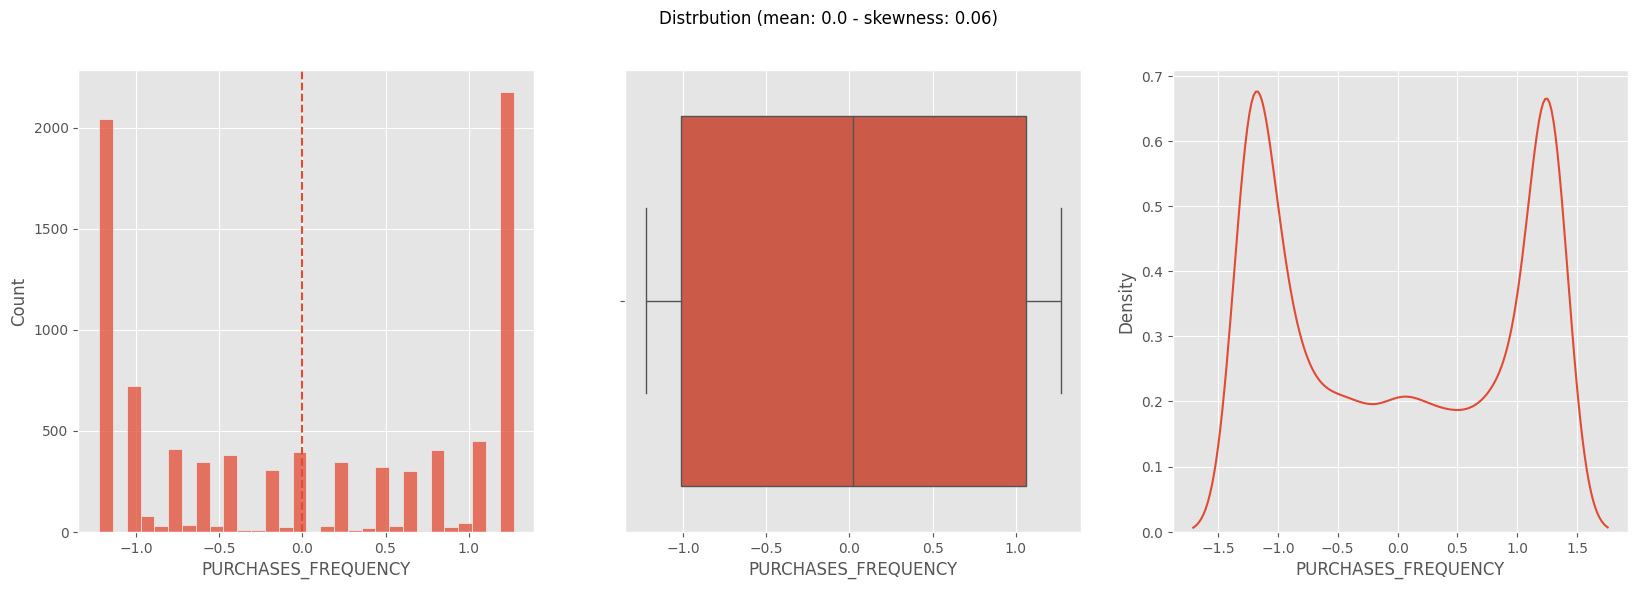

In [61]:
plot_numeric(df_scaled, "PURCHASES_FREQUENCY")

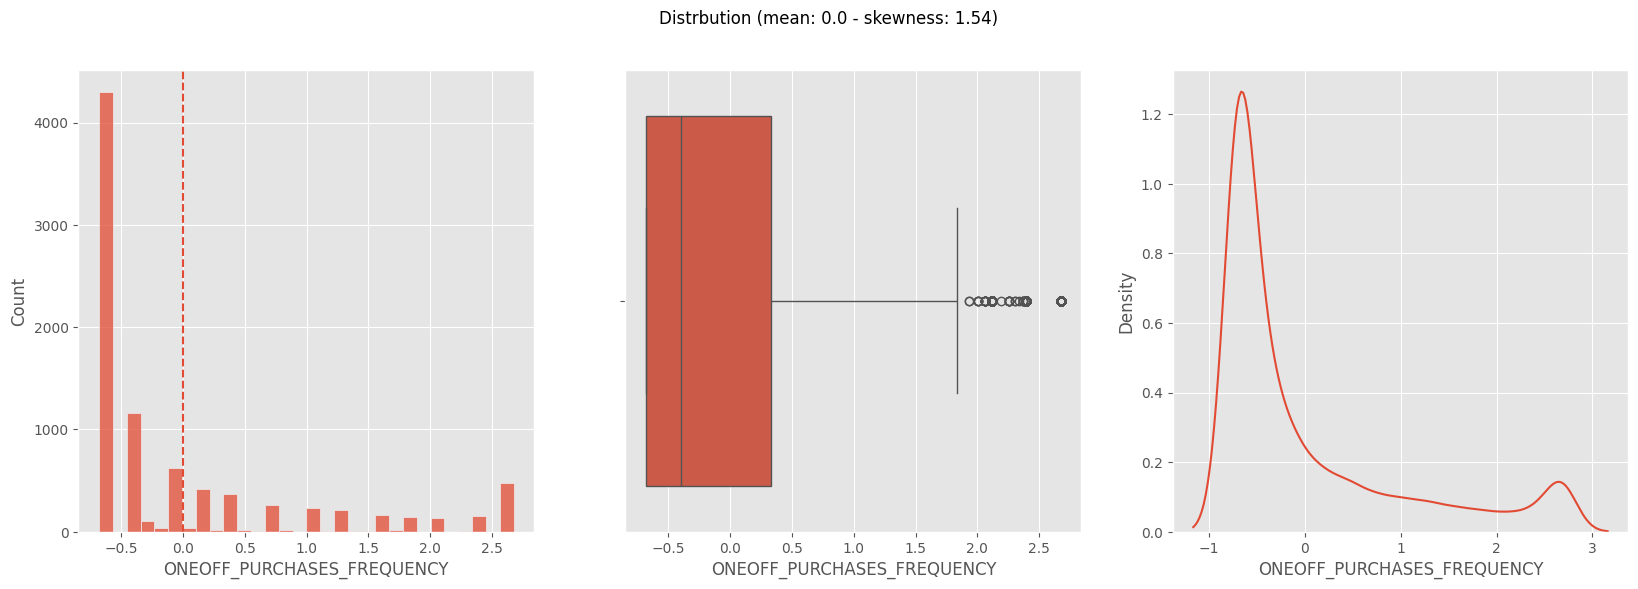

In [62]:
plot_numeric(df_scaled, "ONEOFF_PURCHASES_FREQUENCY")

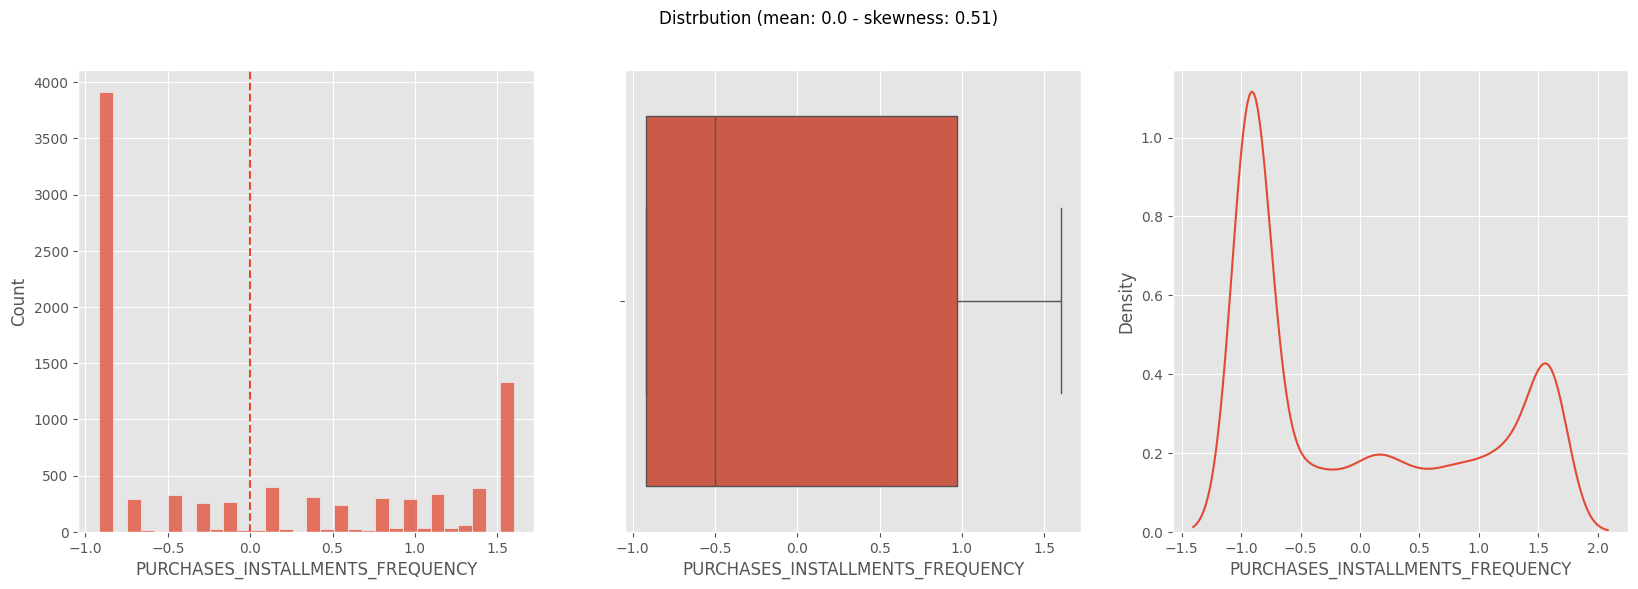

In [63]:
plot_numeric(df_scaled, "PURCHASES_INSTALLMENTS_FREQUENCY")

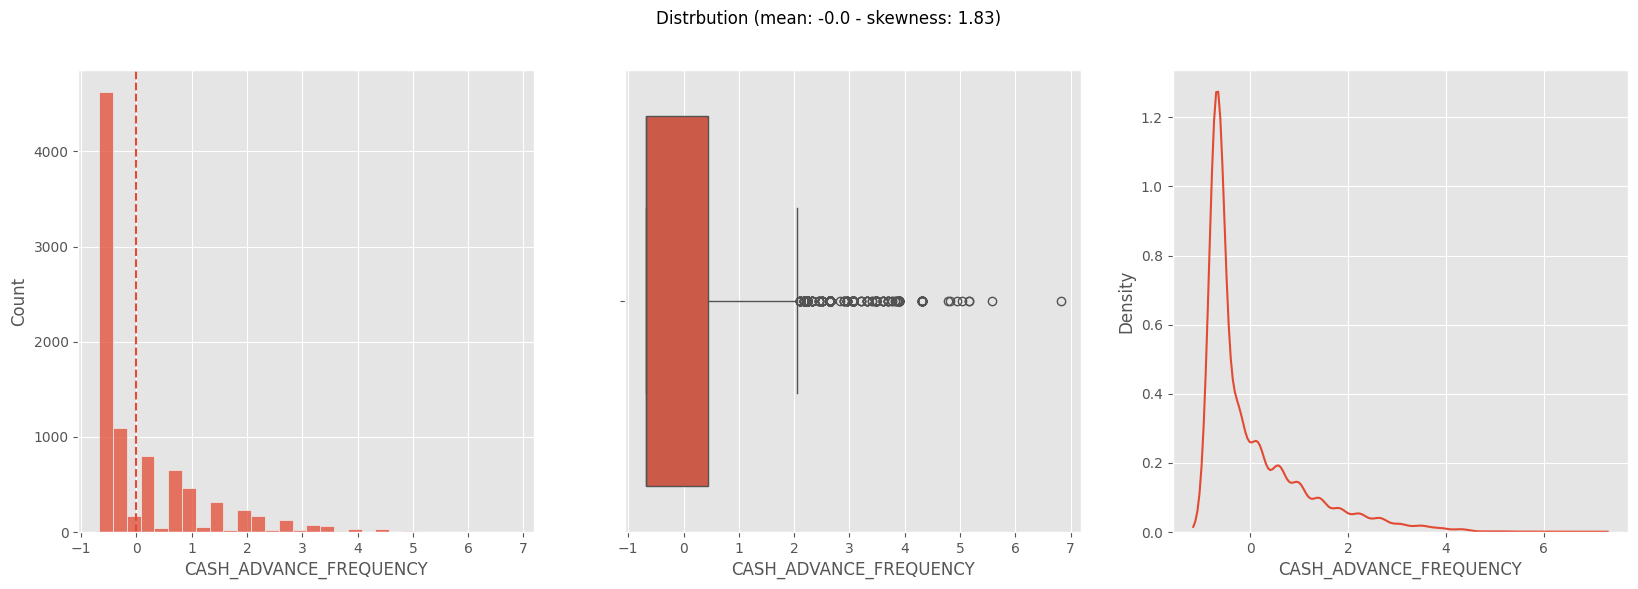

In [64]:
plot_numeric(df_scaled, "CASH_ADVANCE_FREQUENCY")

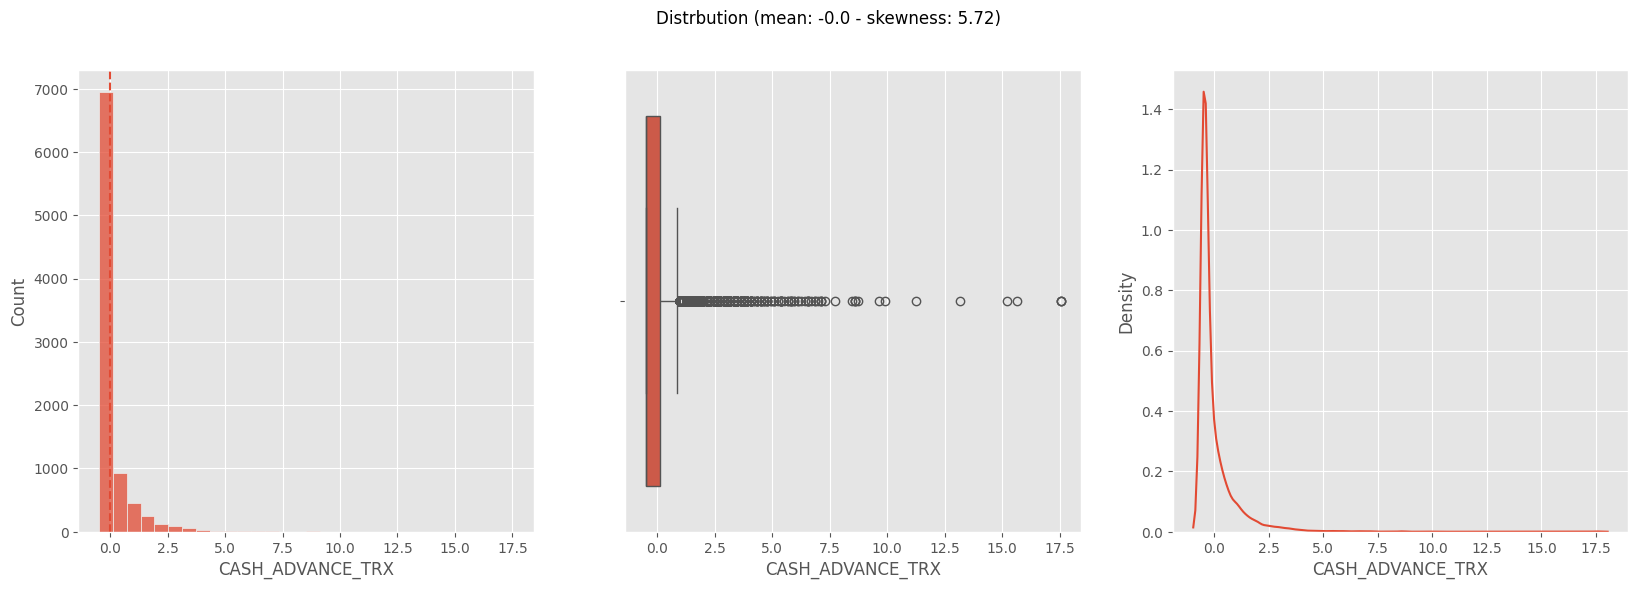

In [65]:
plot_numeric(df_scaled, "CASH_ADVANCE_TRX")

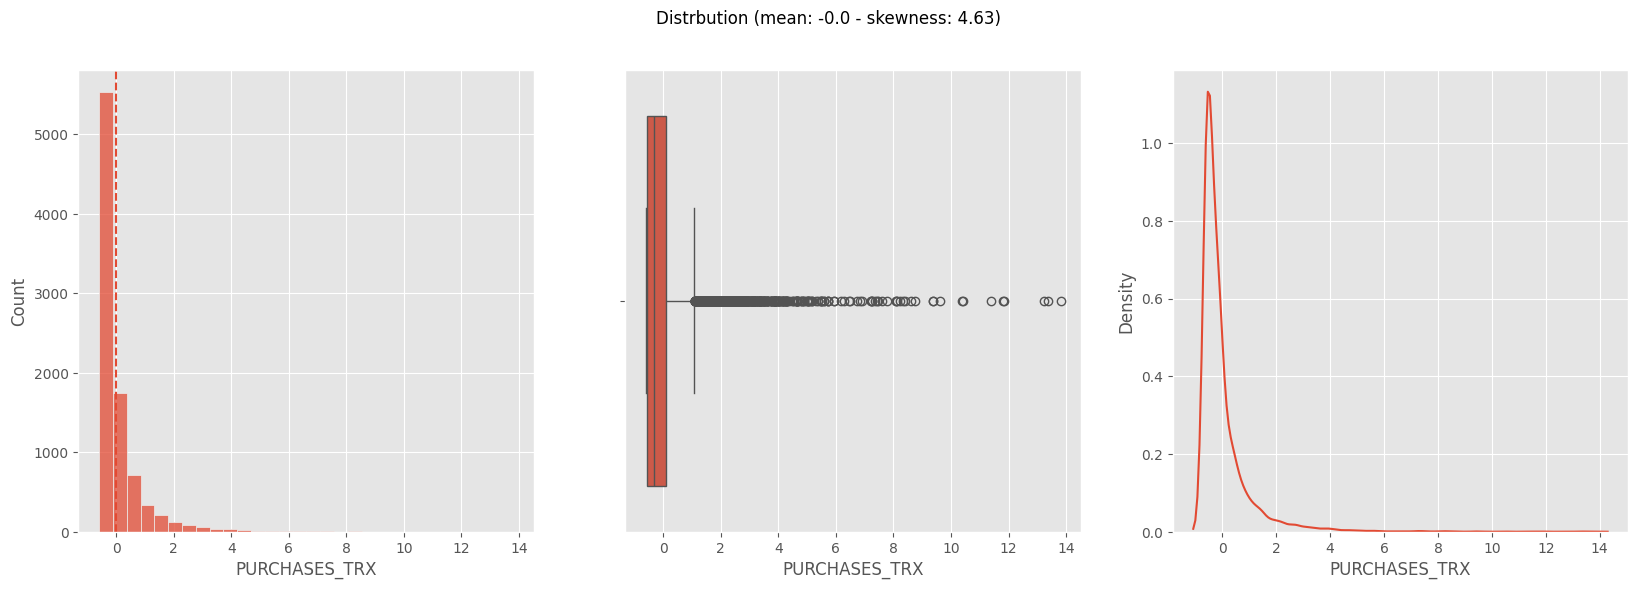

In [66]:
plot_numeric(df_scaled, "PURCHASES_TRX")

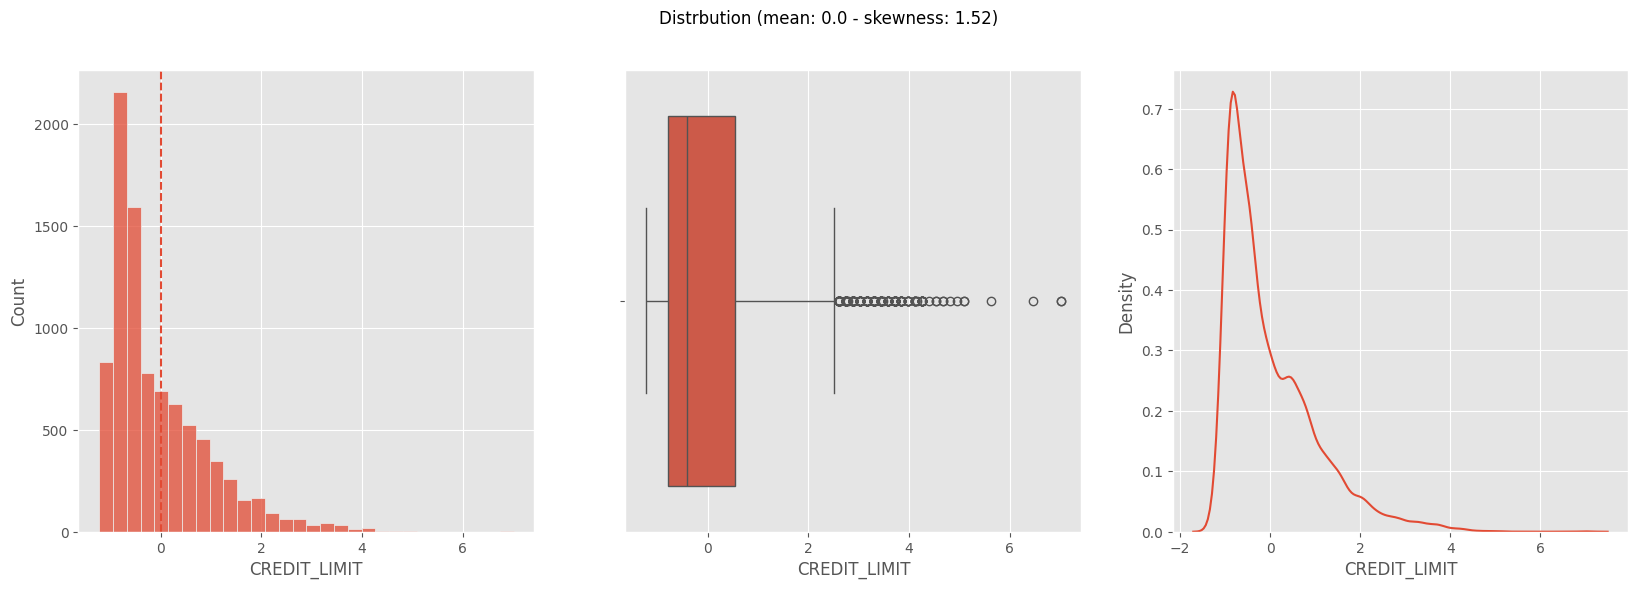

In [67]:
plot_numeric(df_scaled, "CREDIT_LIMIT")

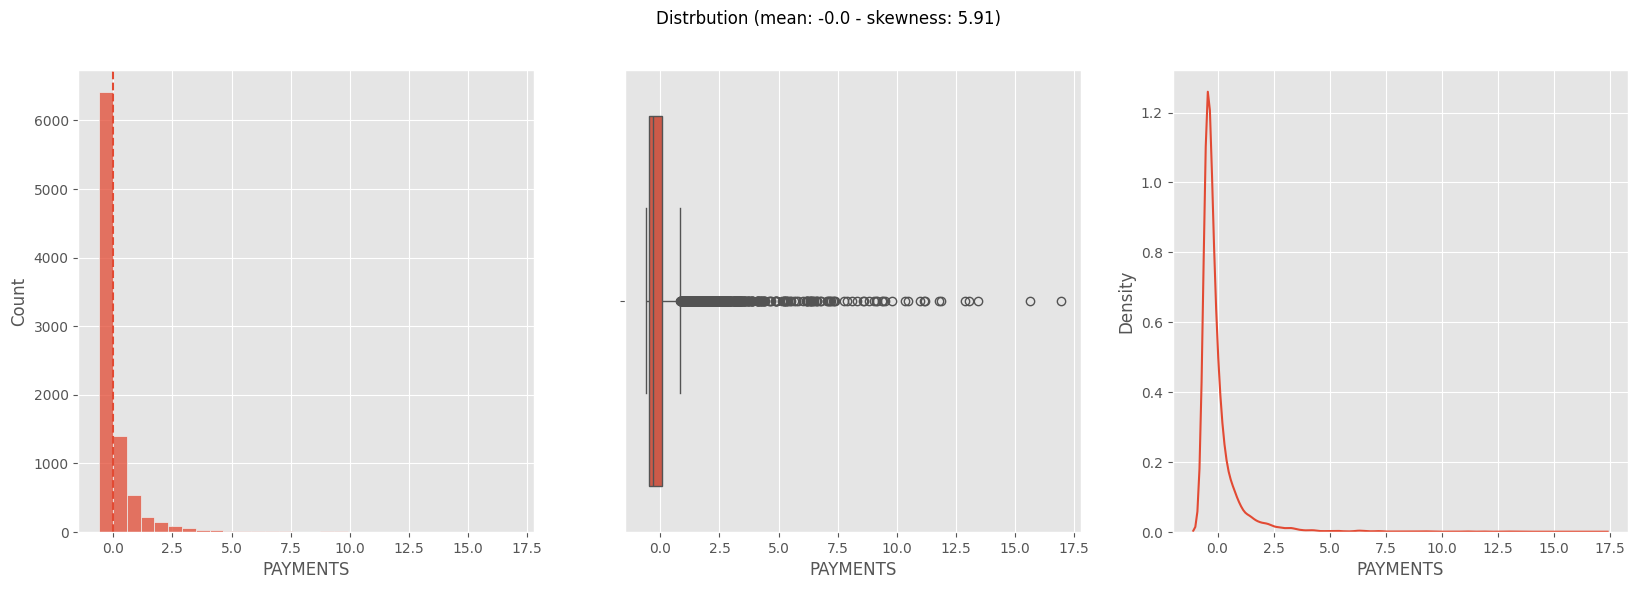

In [68]:
plot_numeric(df_scaled, "PAYMENTS")

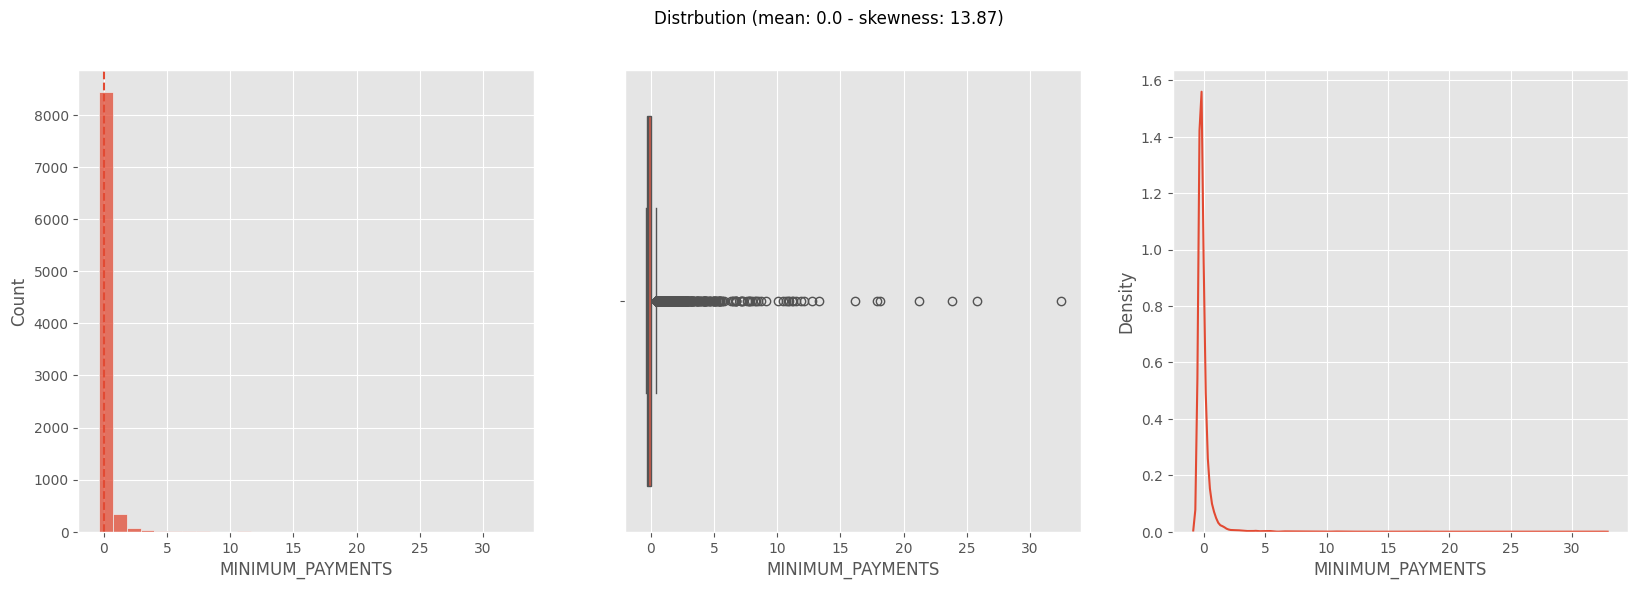

In [69]:
plot_numeric(df_scaled, "MINIMUM_PAYMENTS")

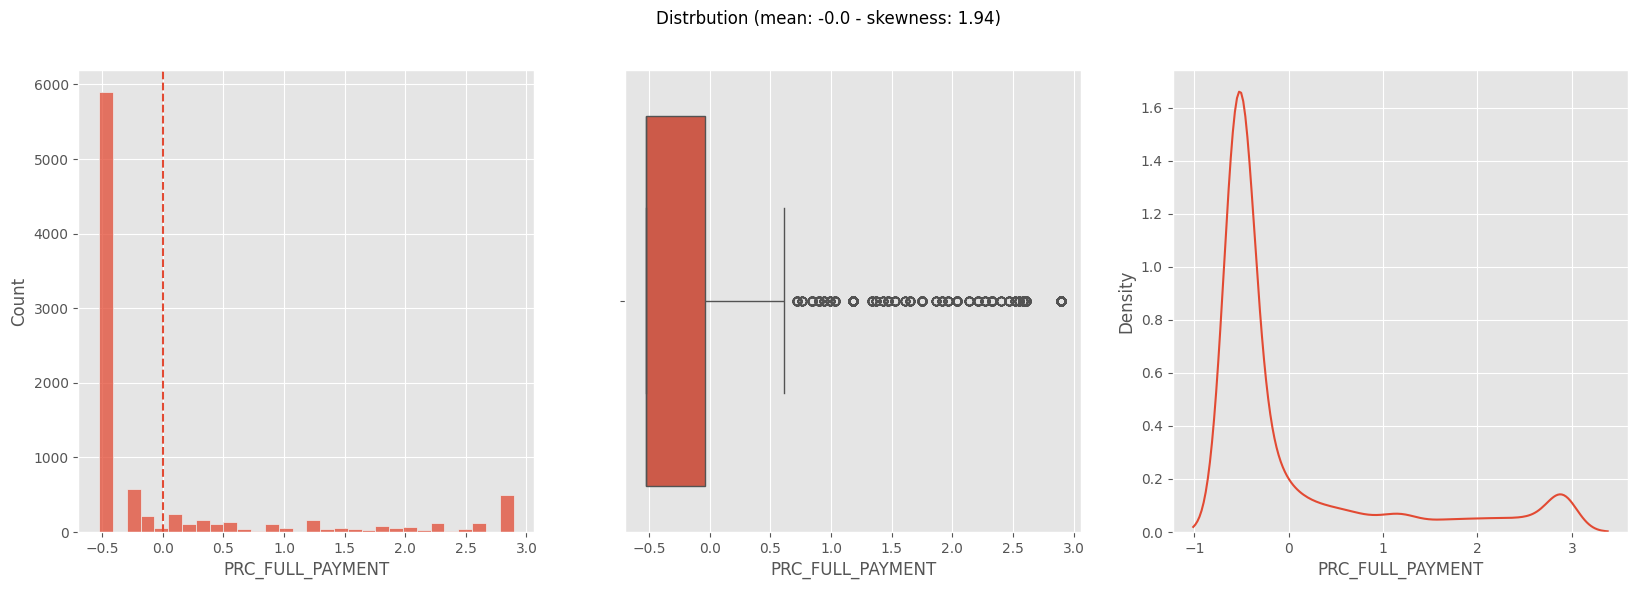

In [70]:
plot_numeric(df_scaled, "PRC_FULL_PAYMENT")

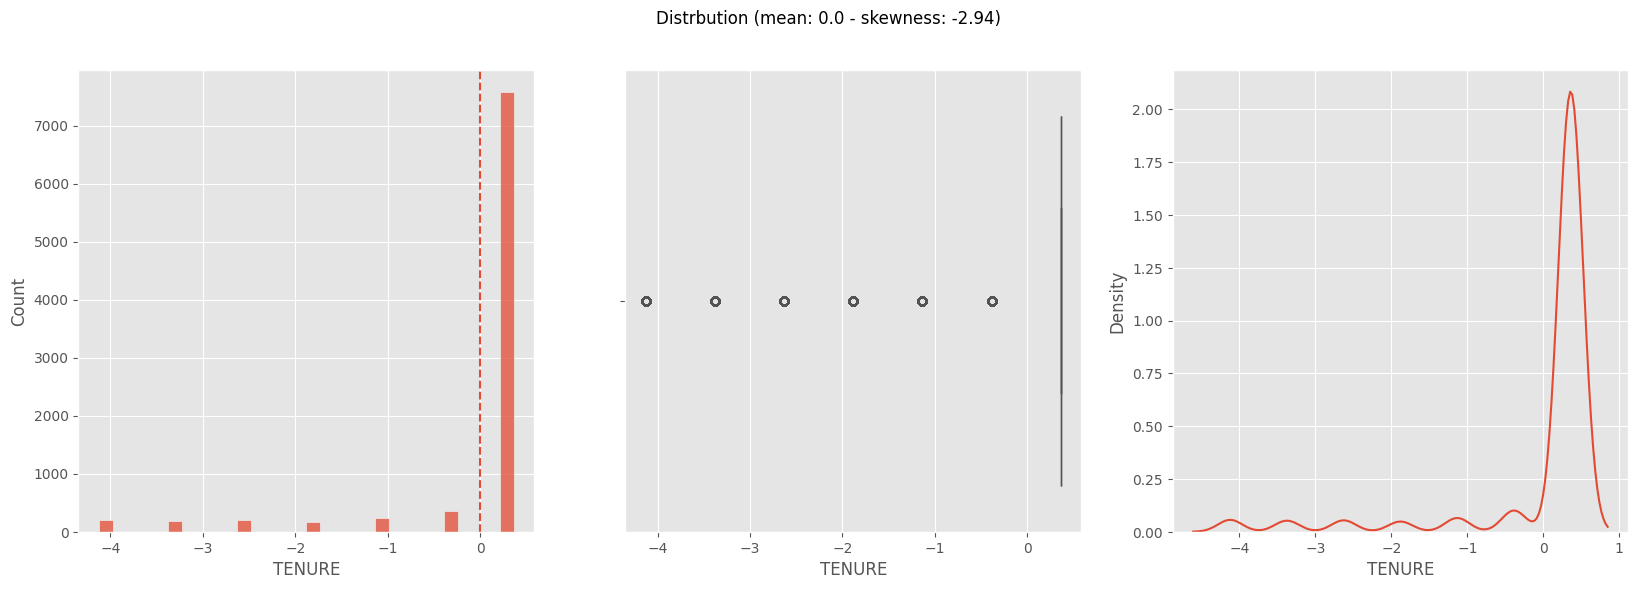

In [71]:
plot_numeric(df_scaled, "TENURE")

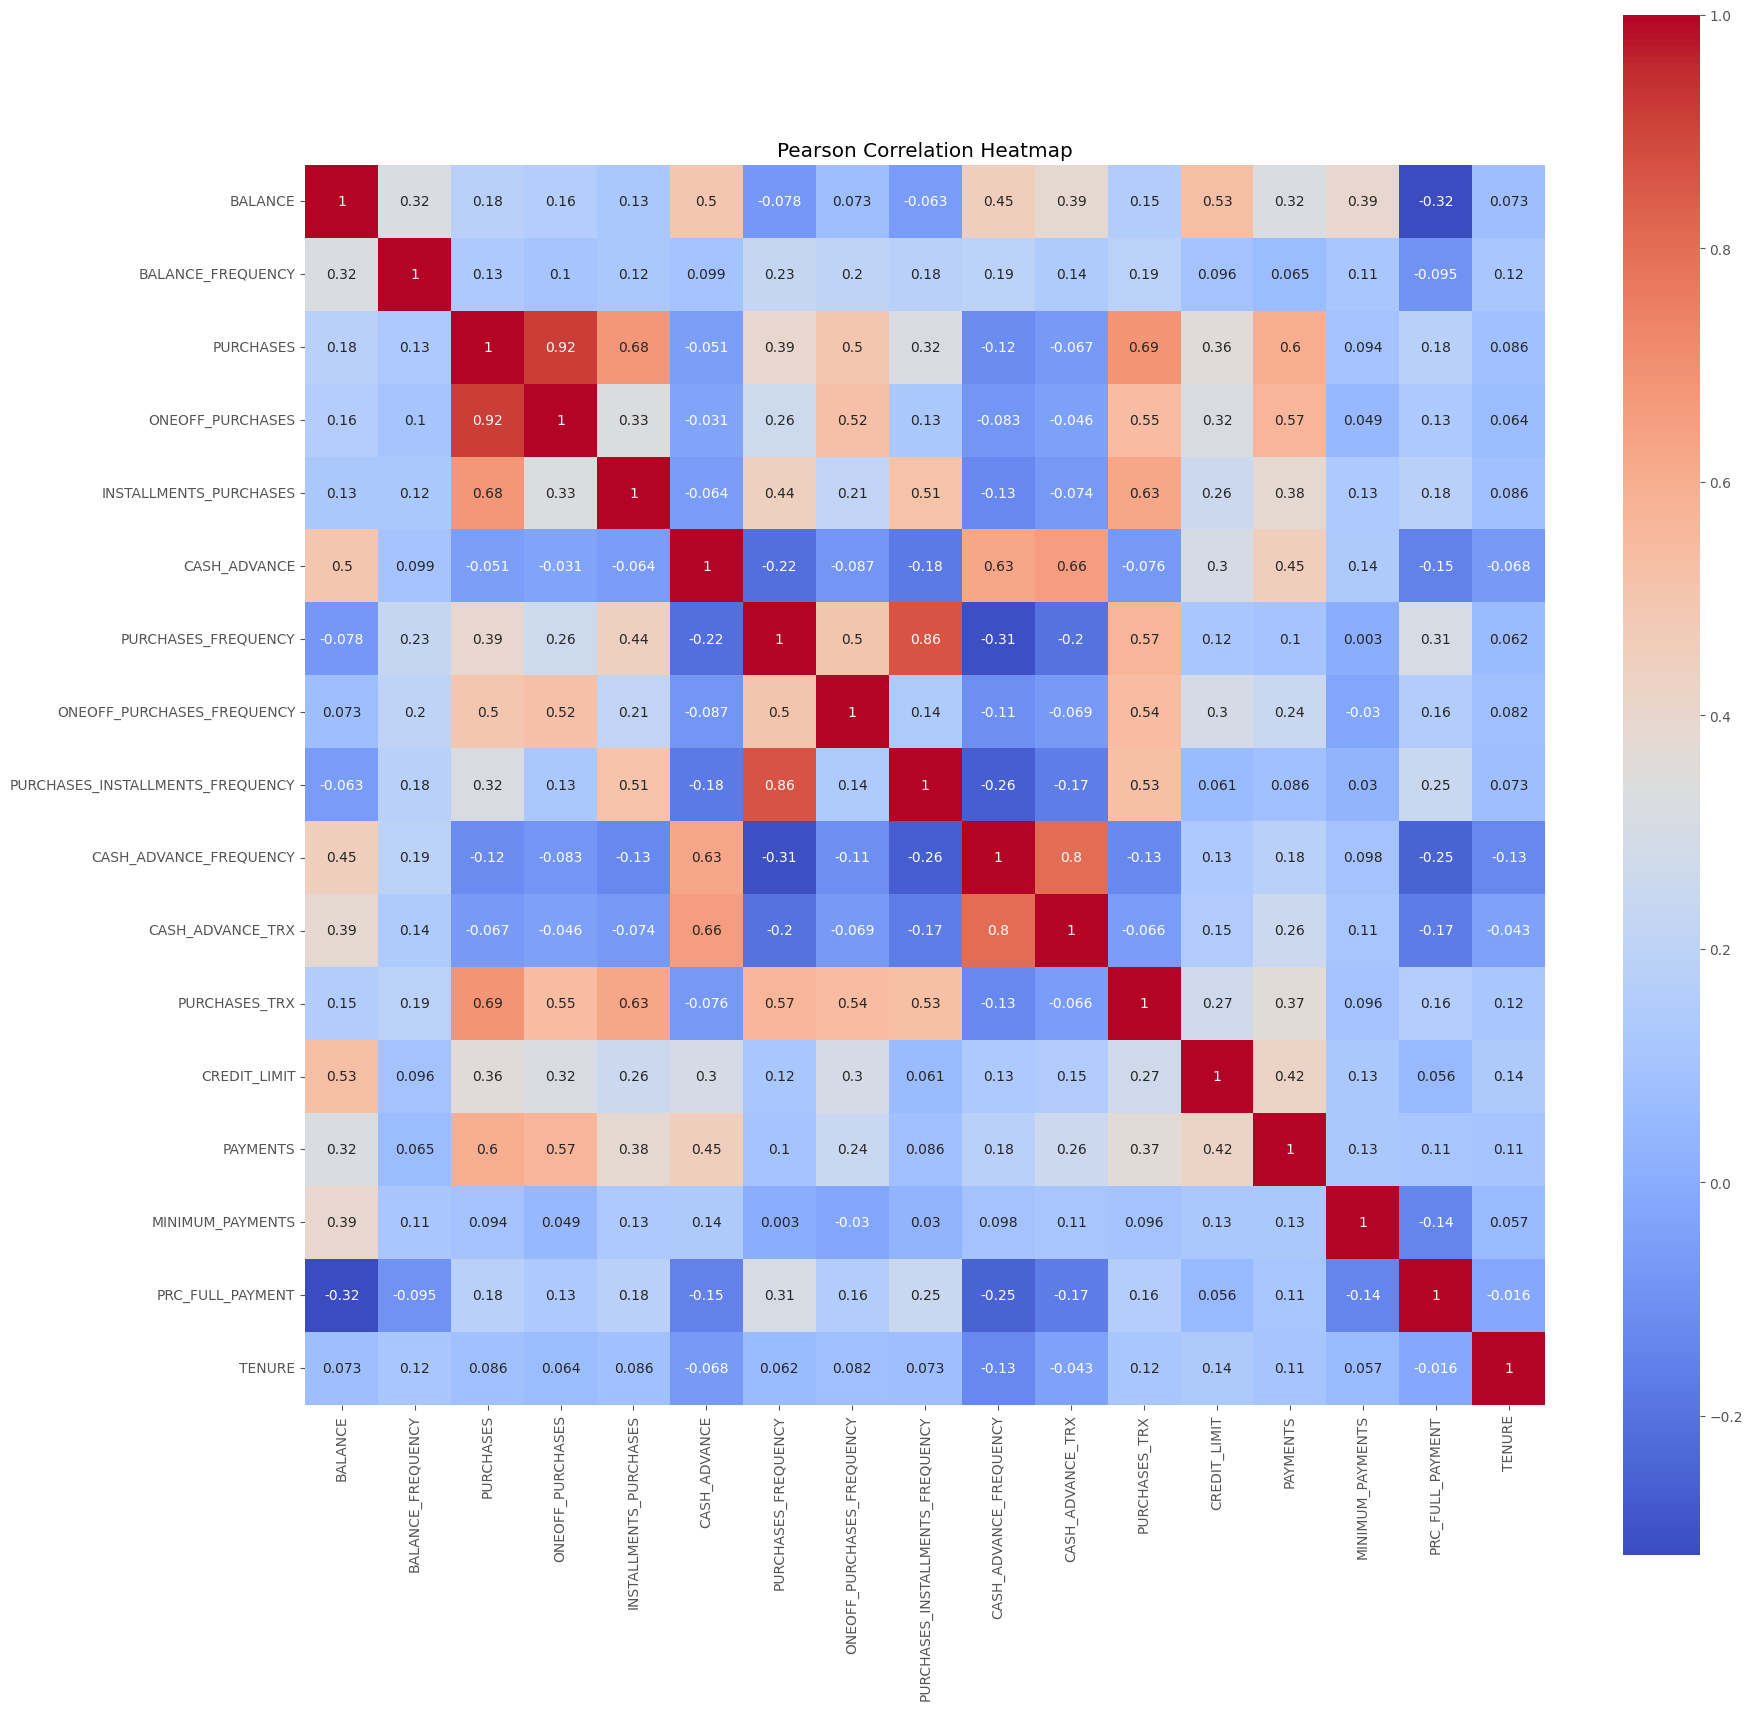

In [72]:
correlation_matrix = df_scaled.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", square = True)
plt.title("Pearson Correlation Heatmap")
plt.show()

<Axes: title={'center': 'Numeric features distribution'}, ylabel='Density'>

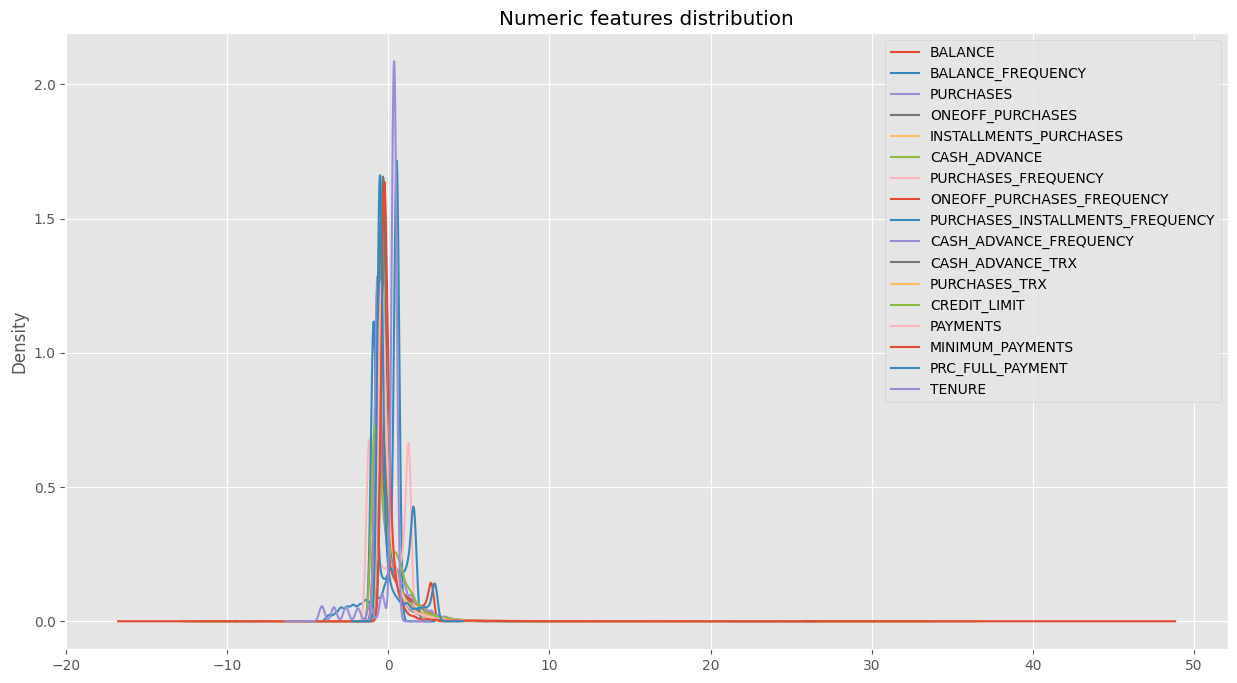

In [73]:
df_scaled.plot(kind = "kde", figsize = (15, 8), title = "Numeric features distribution")

In [74]:
df_scaled = df_scaled.drop(columns = "ONEOFF_PURCHASES")
df_scaled = df_scaled.drop(columns = "PURCHASES_INSTALLMENTS_FREQUENCY")
df_scaled = df_scaled.drop(columns = "CASH_ADVANCE_FREQUENCY")

In [78]:
from sklearn.decomposition import PCA
import numpy as np

In [77]:
pca = PCA()
x_pca = pca.fit_transform(df_scaled.values)

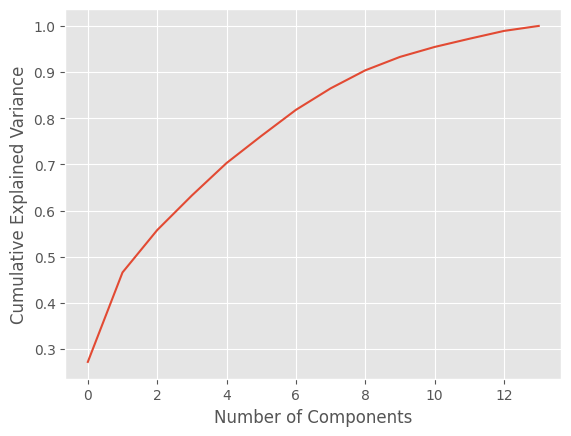

In [79]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [80]:
explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components}")

Number of components to retain 95% variance: 11
